3
4
5
6
7
8
9
10
11
12


/Users/jkudlerflam/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
done


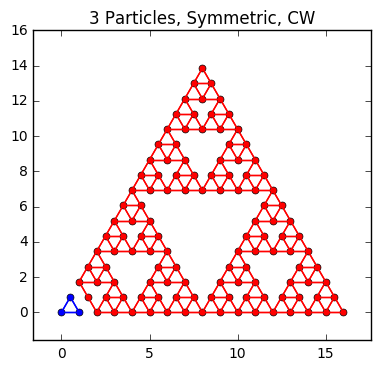

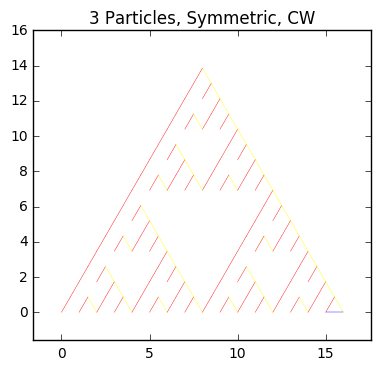

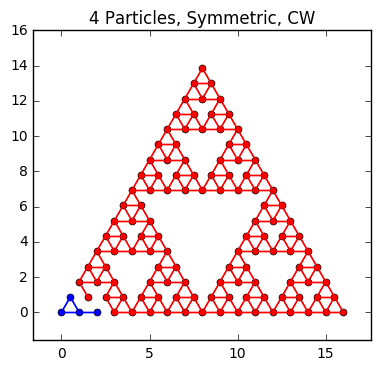

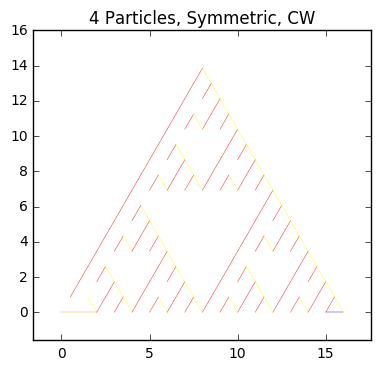

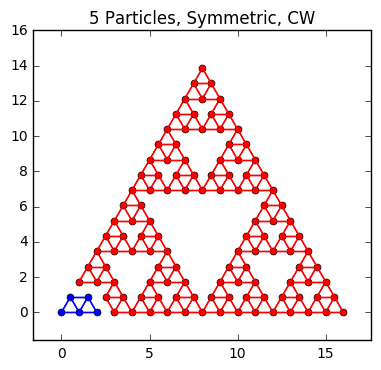

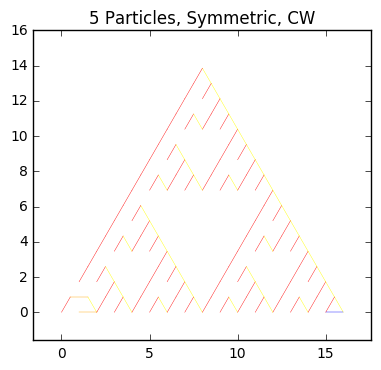

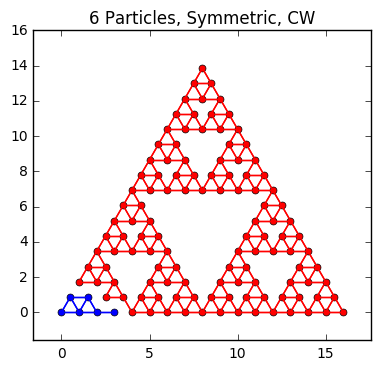

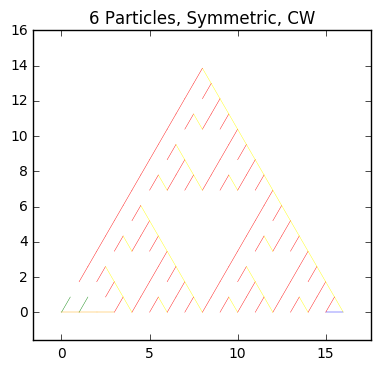

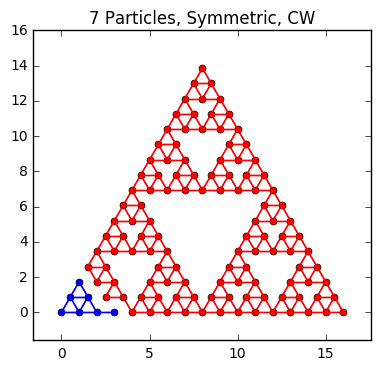

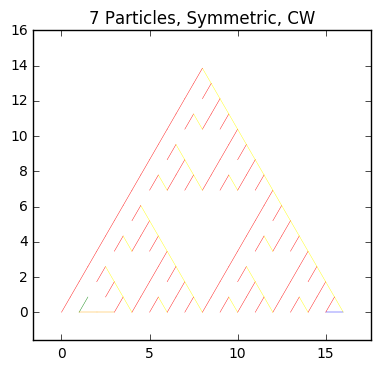

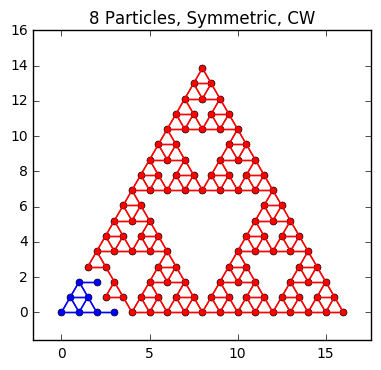

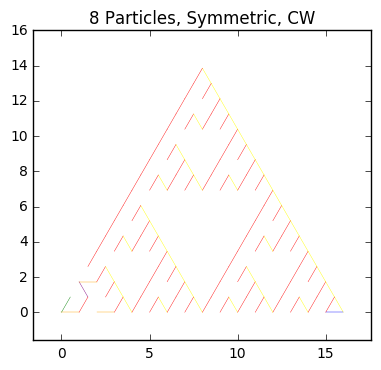

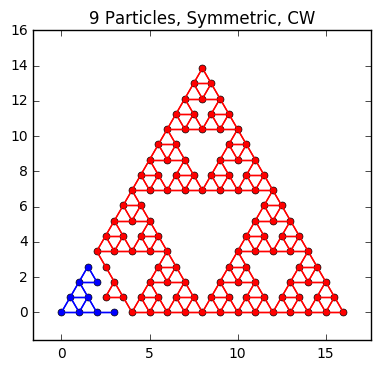

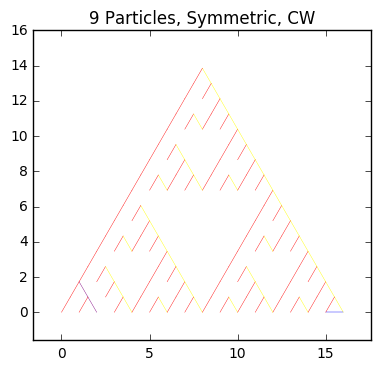

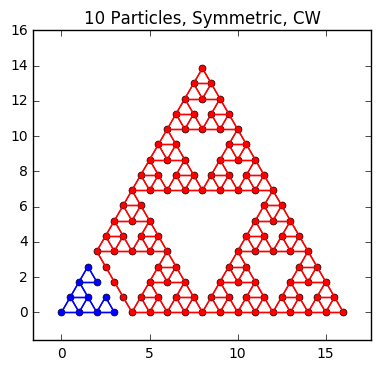

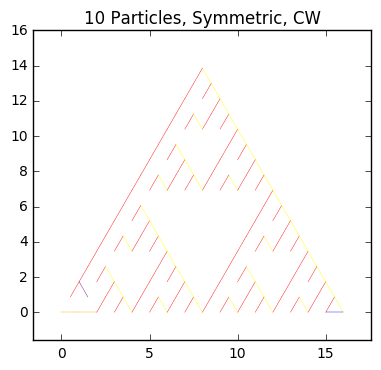

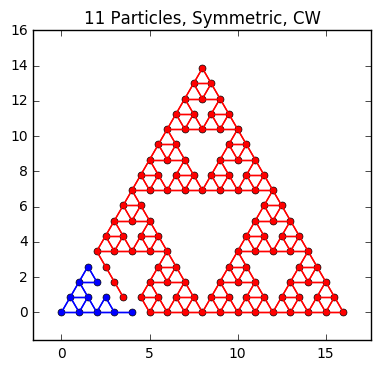

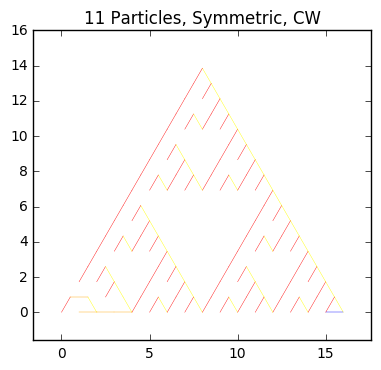

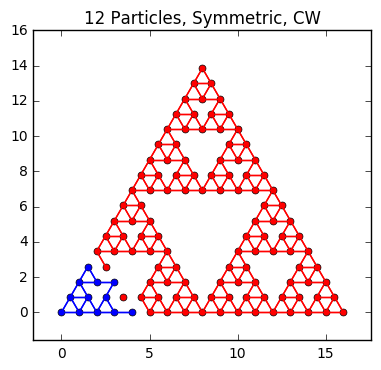

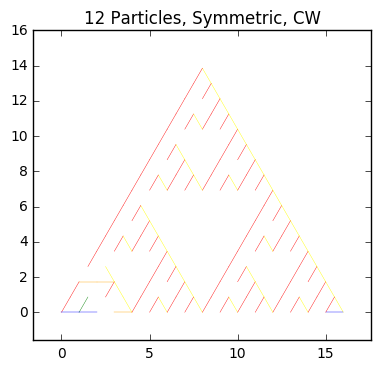

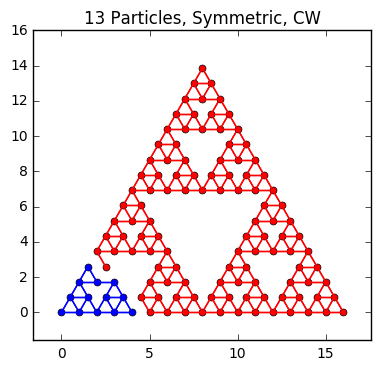

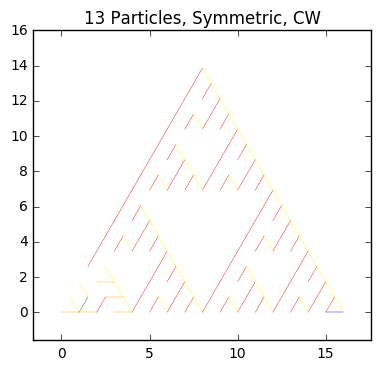

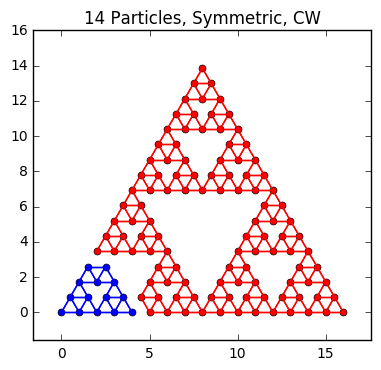

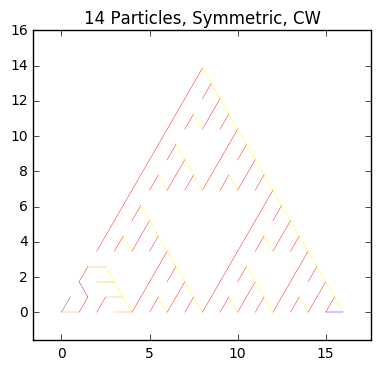

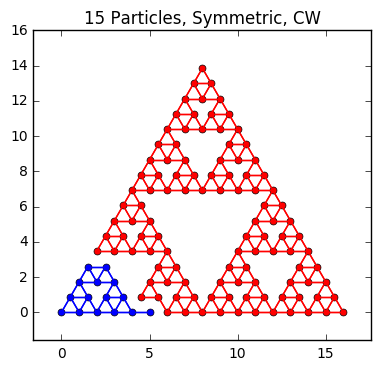

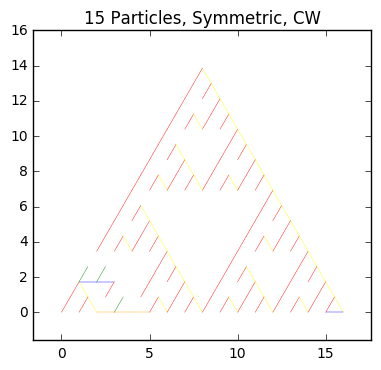

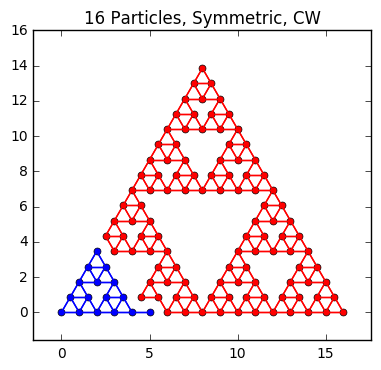

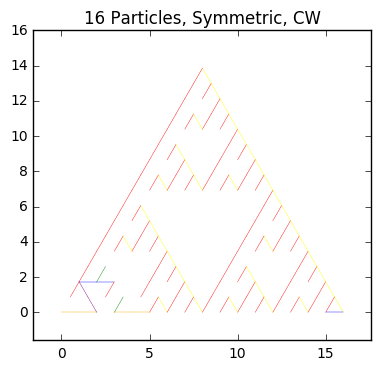

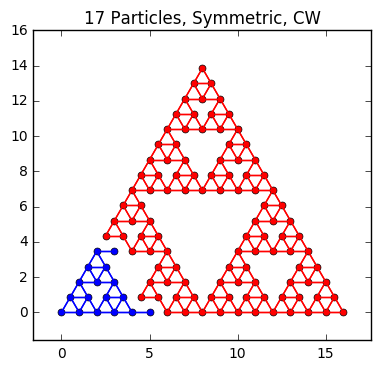

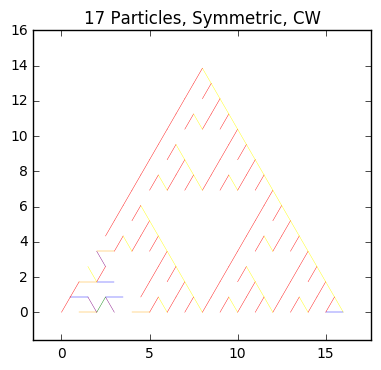

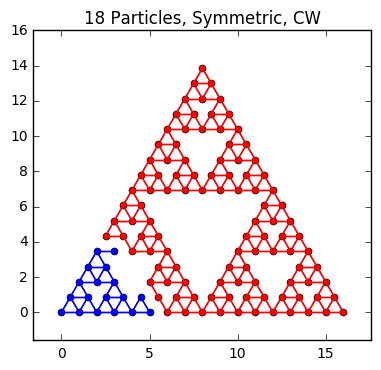

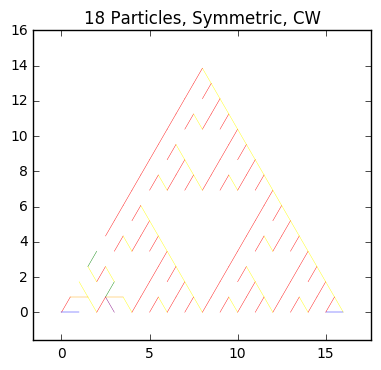

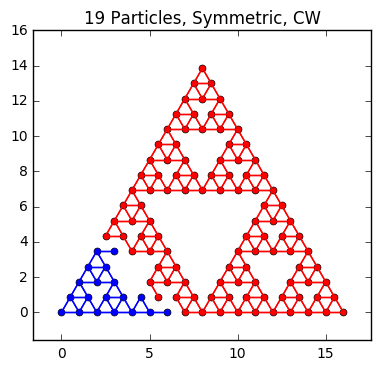

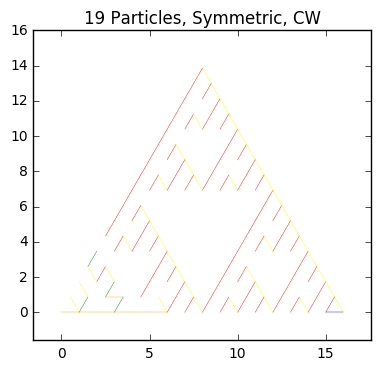

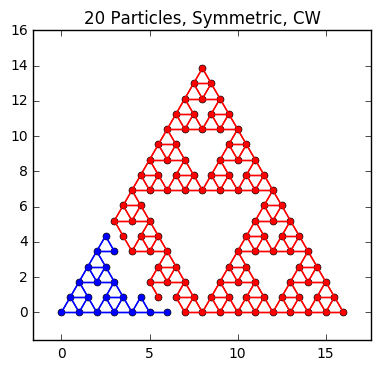

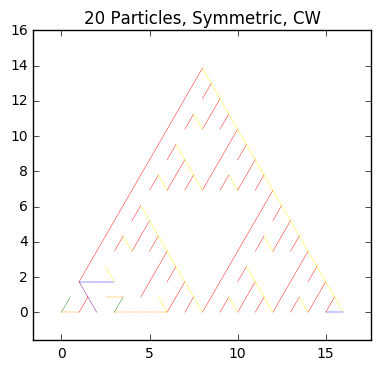

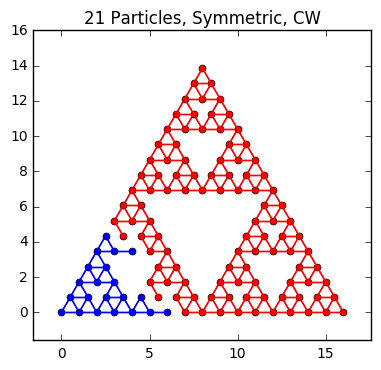

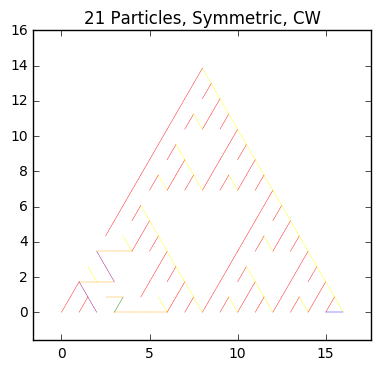

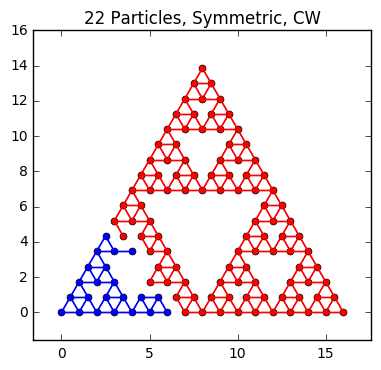

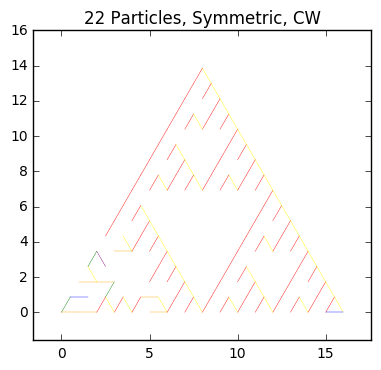

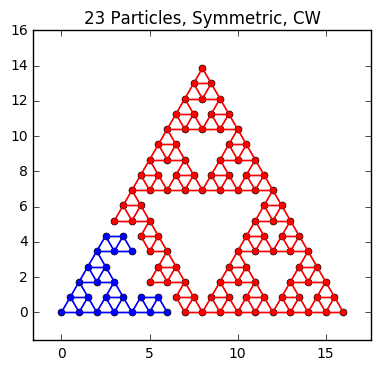

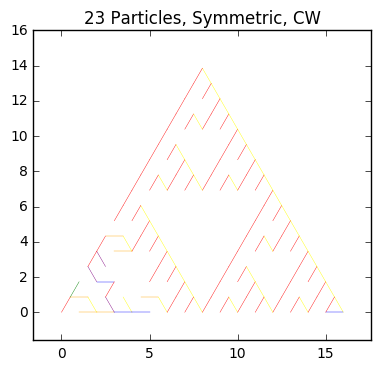

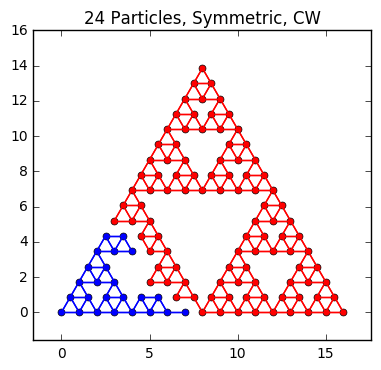

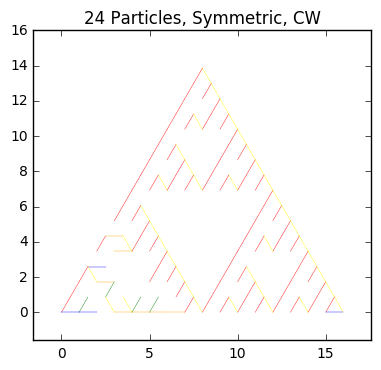

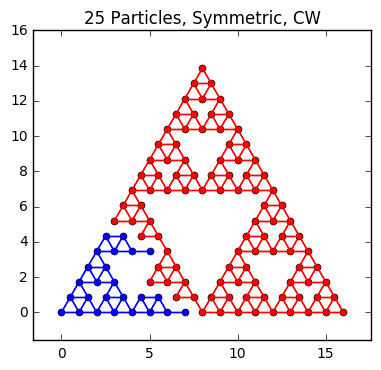

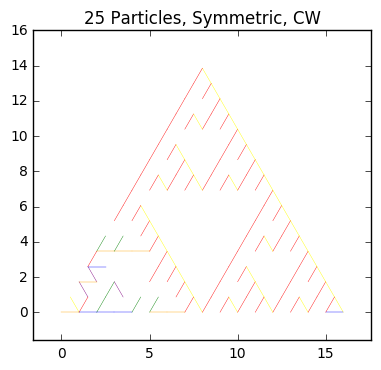

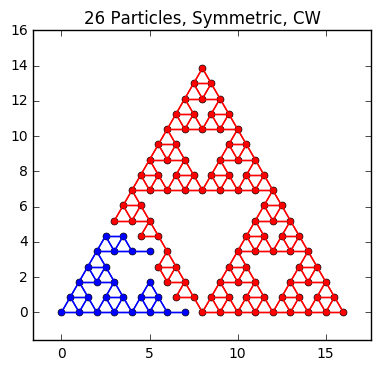

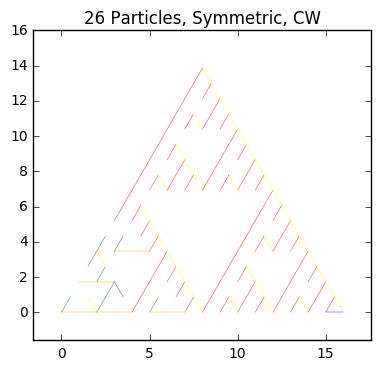

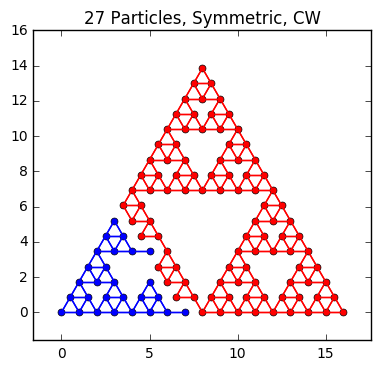

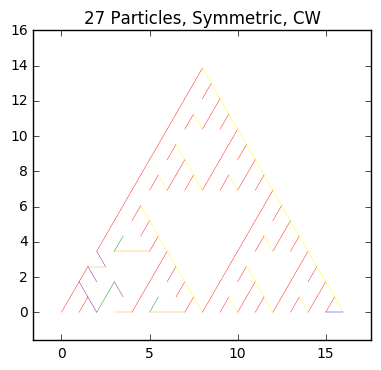

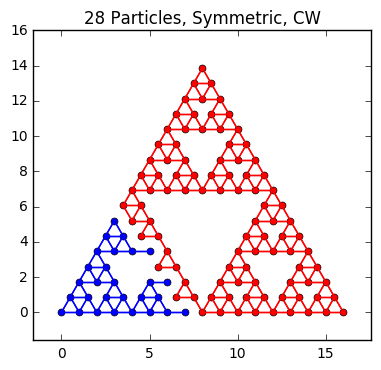

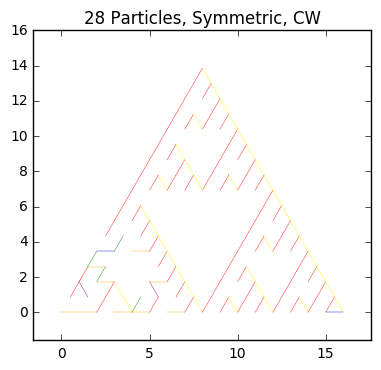

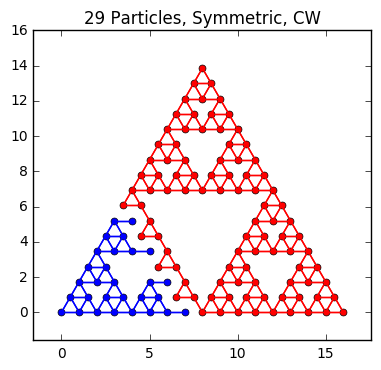

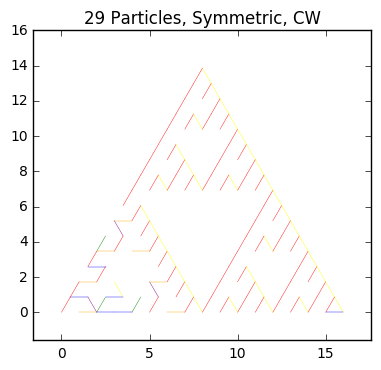

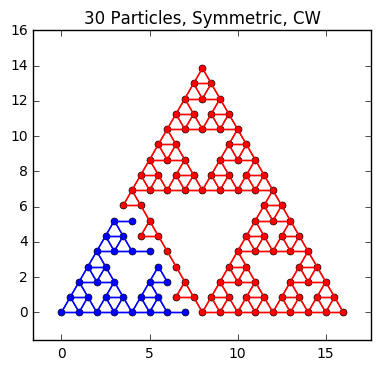

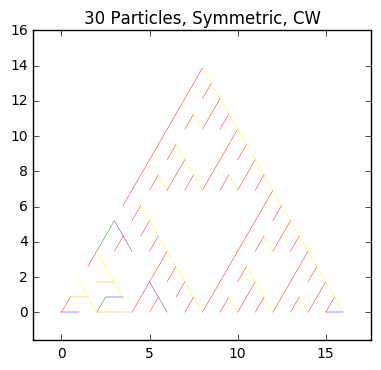

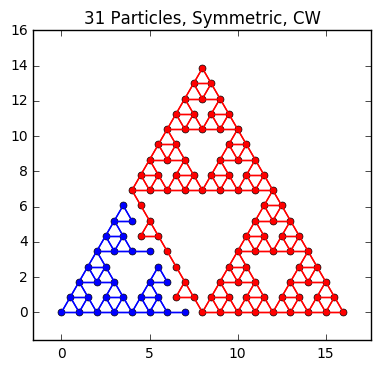

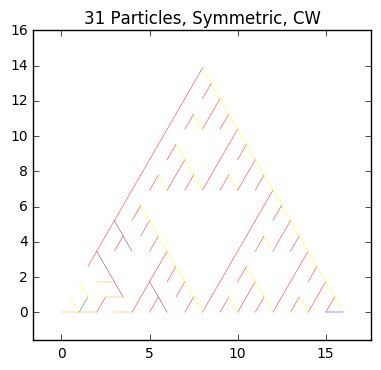

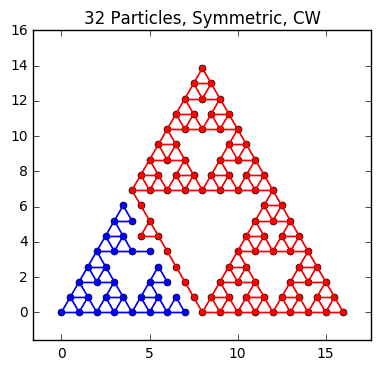

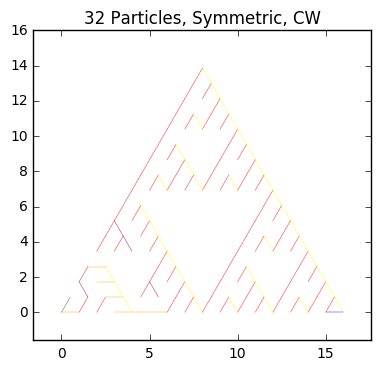

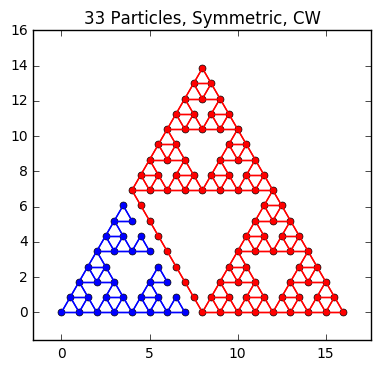

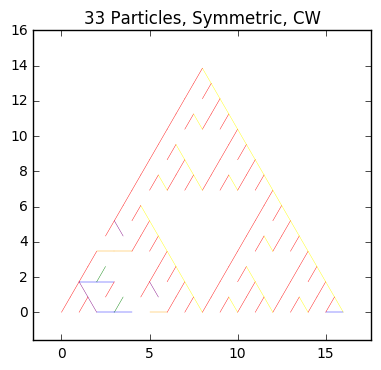

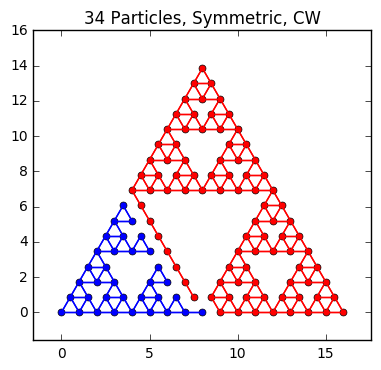

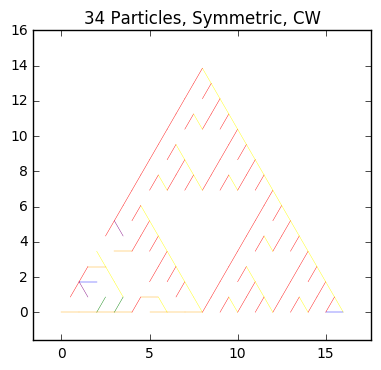

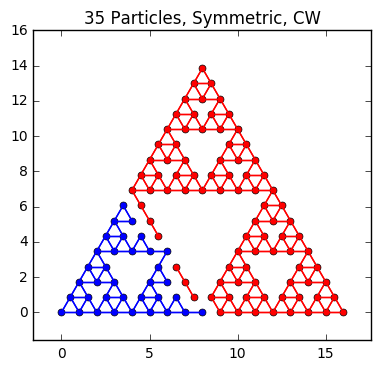

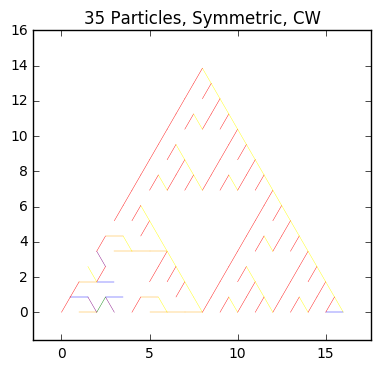

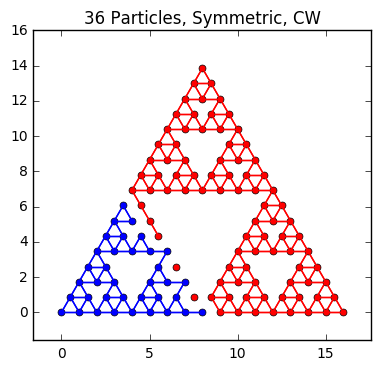

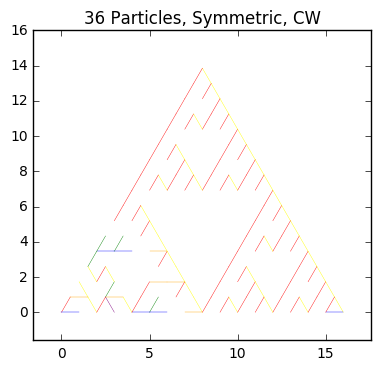

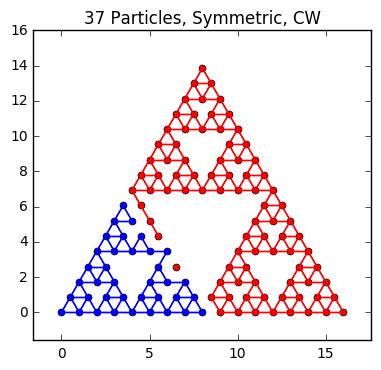

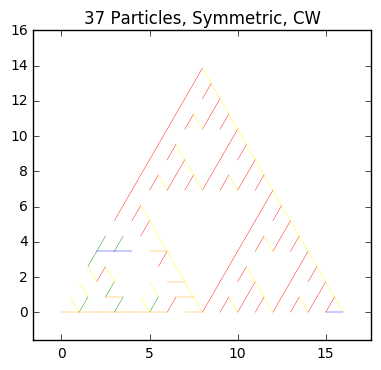

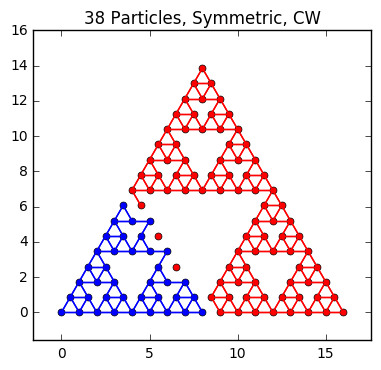

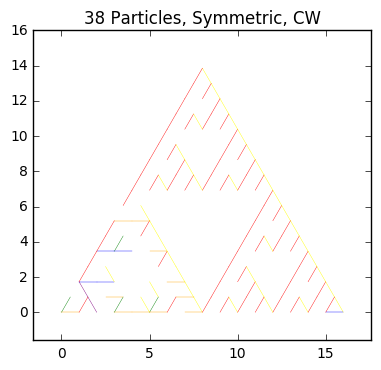

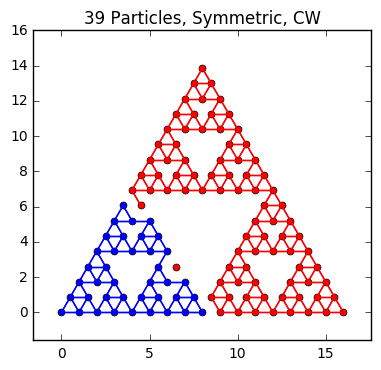

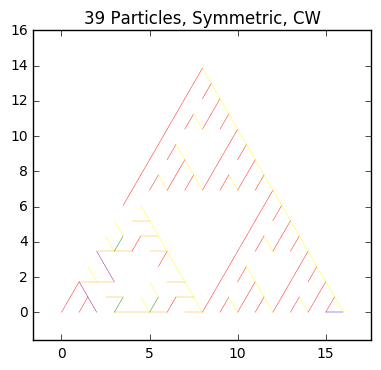

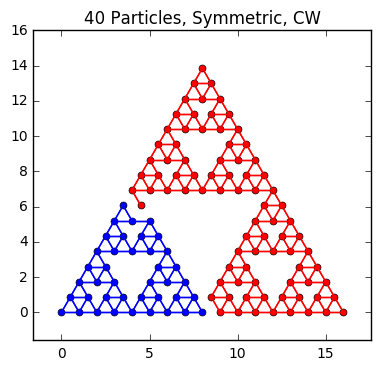

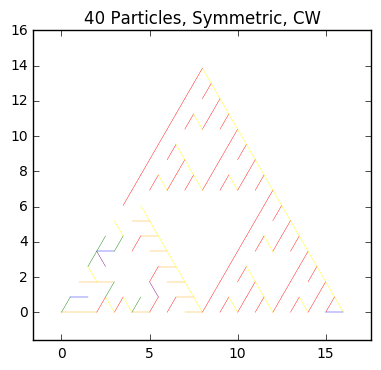

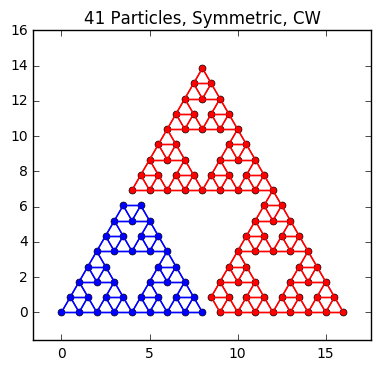

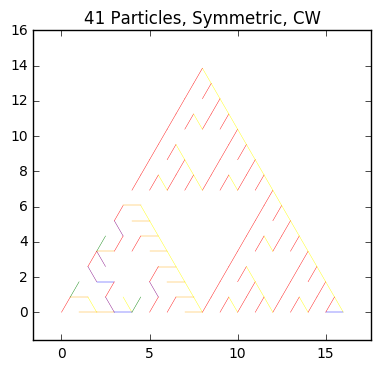

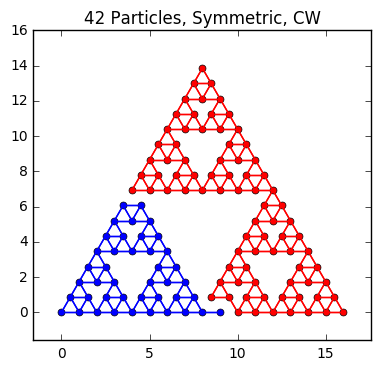

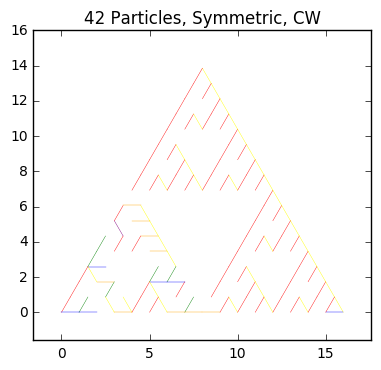

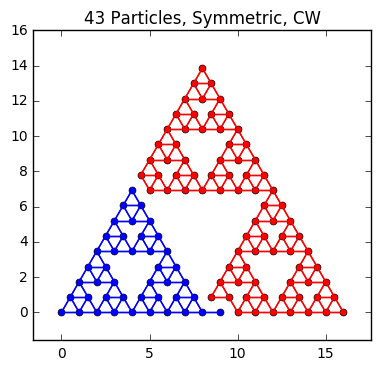

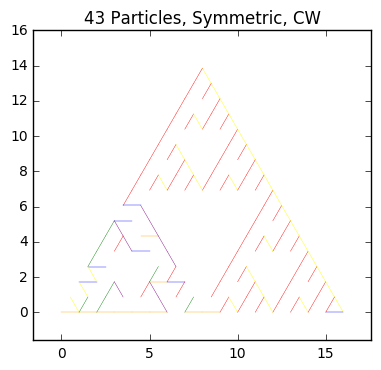

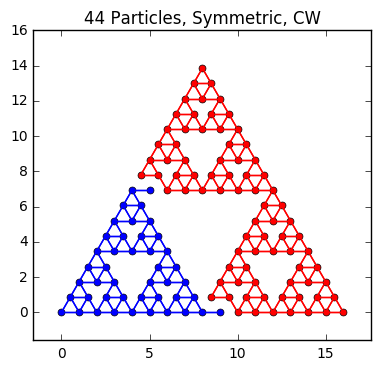

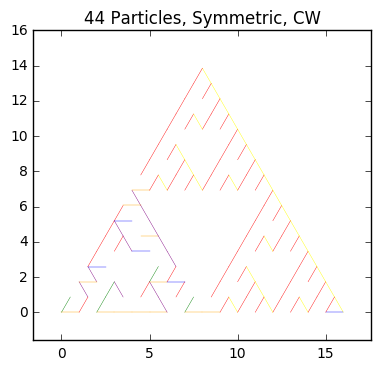

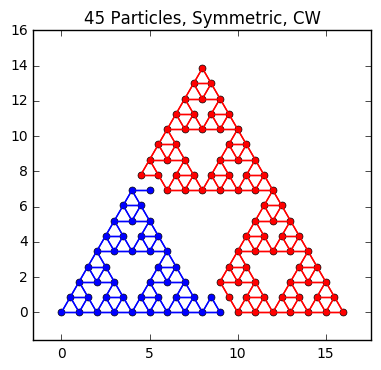

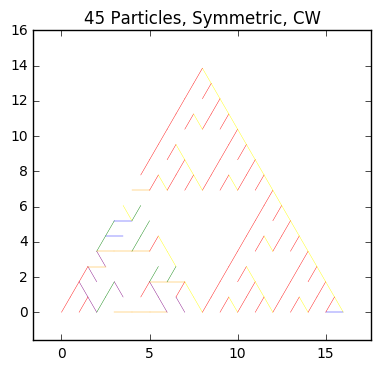

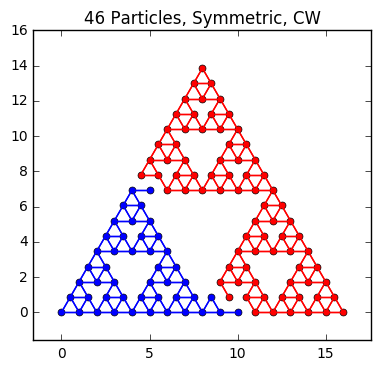

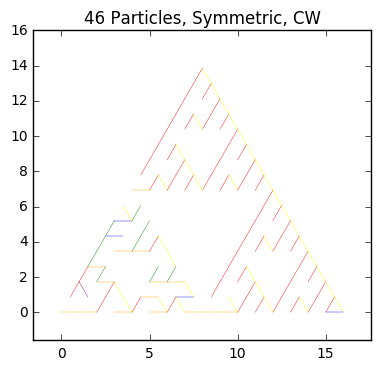

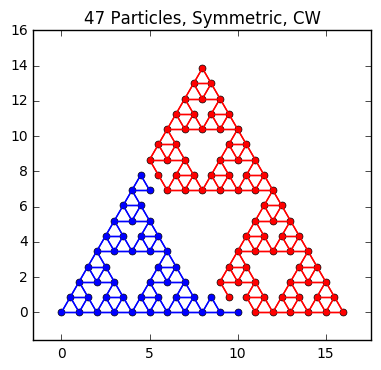

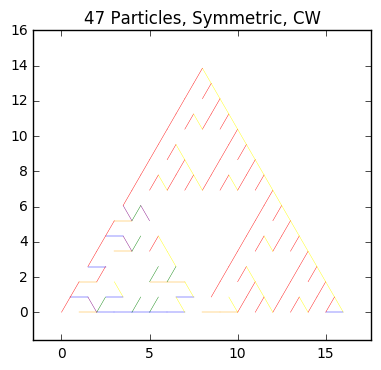

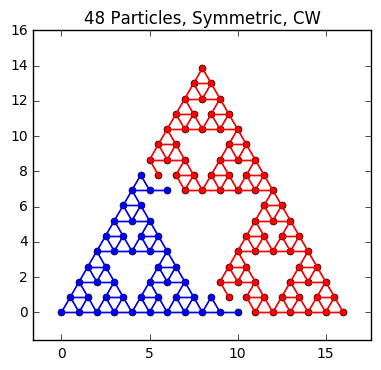

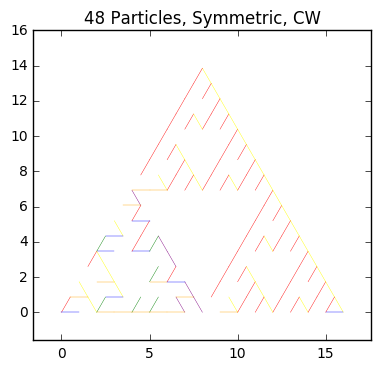

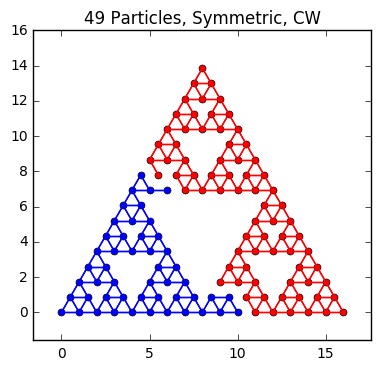

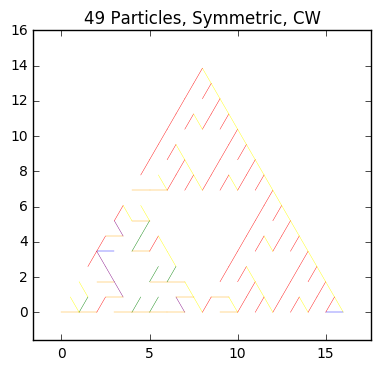

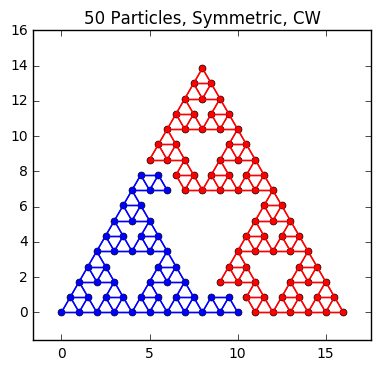

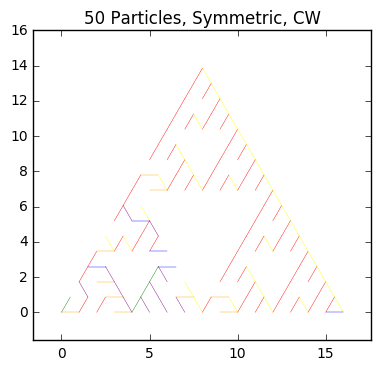

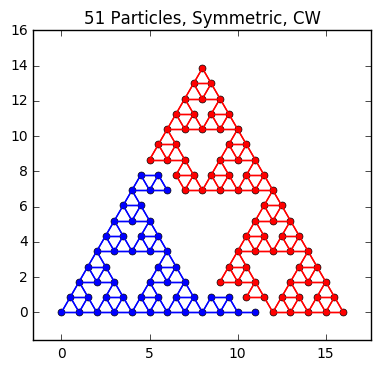

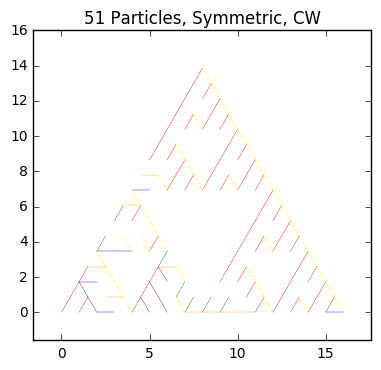

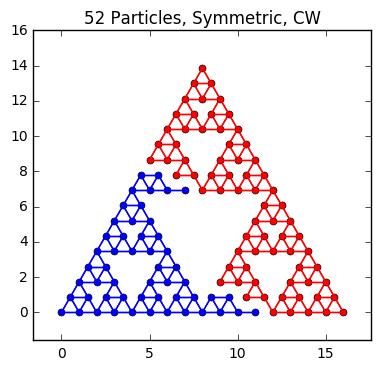

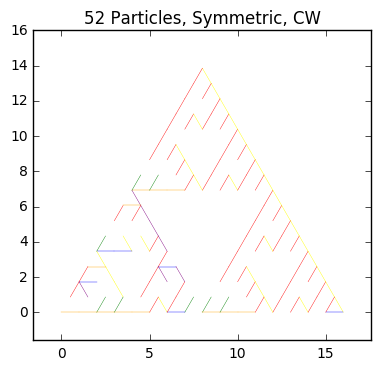

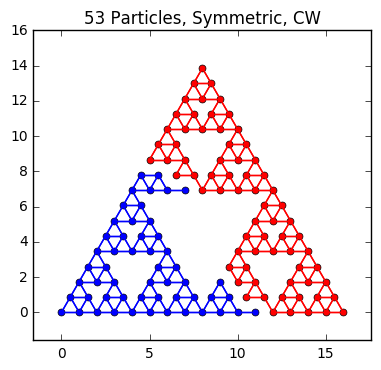

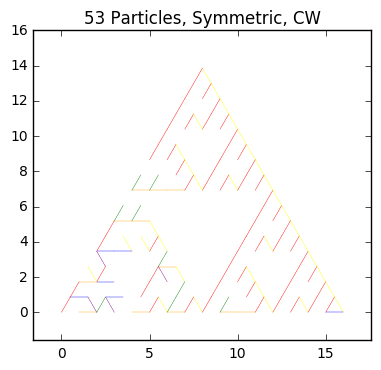

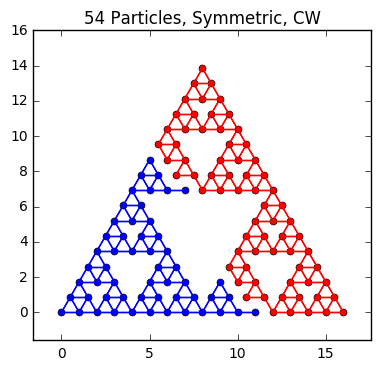

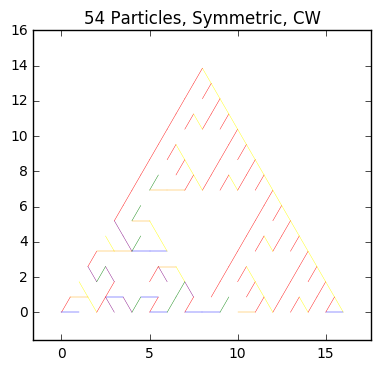

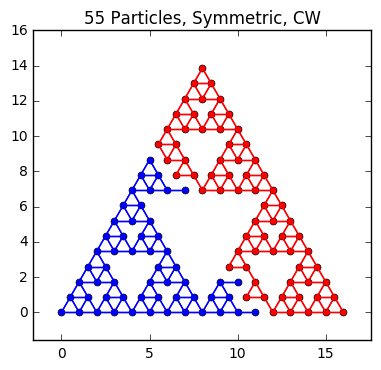

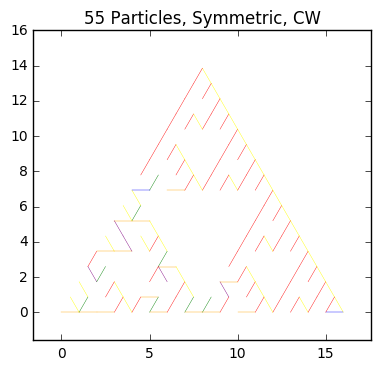

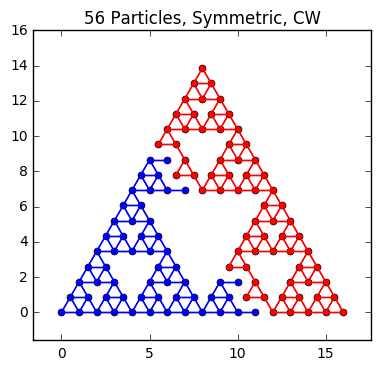

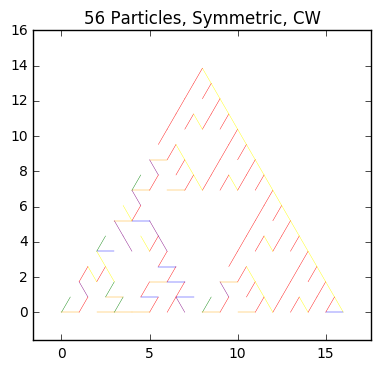

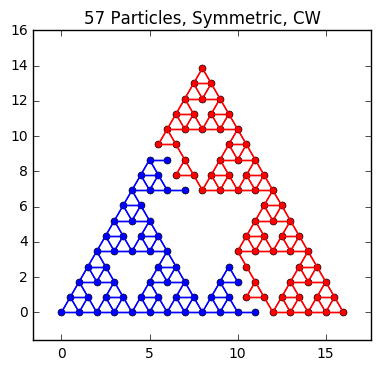

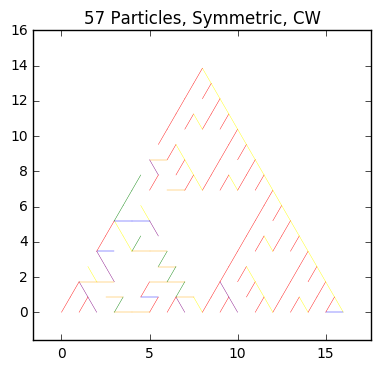

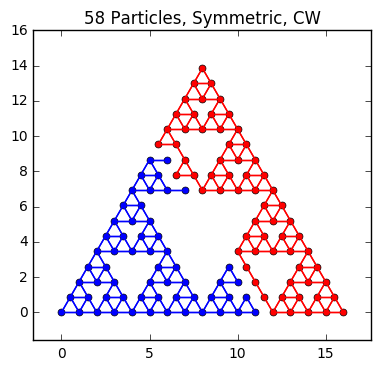

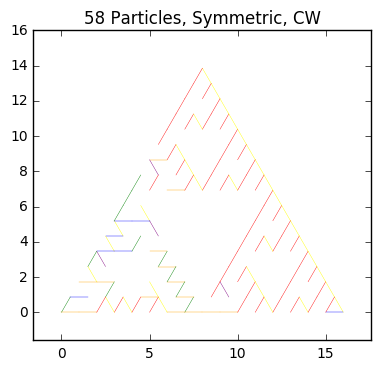

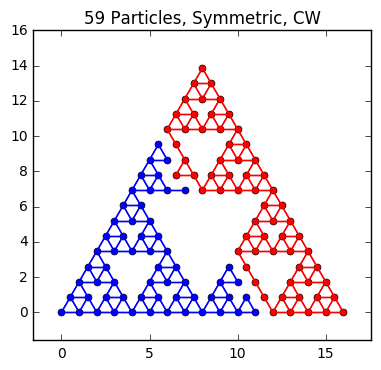

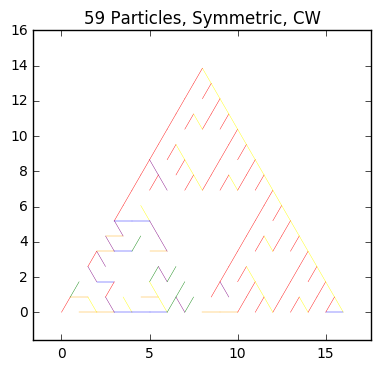

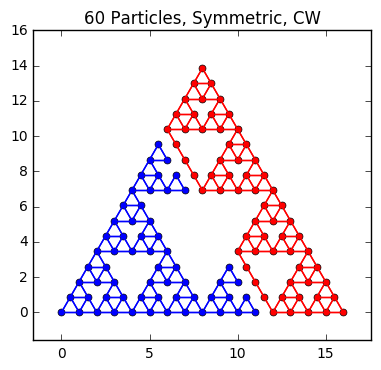

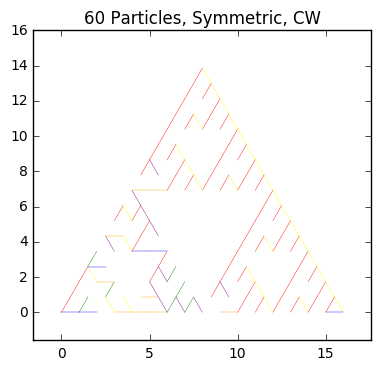

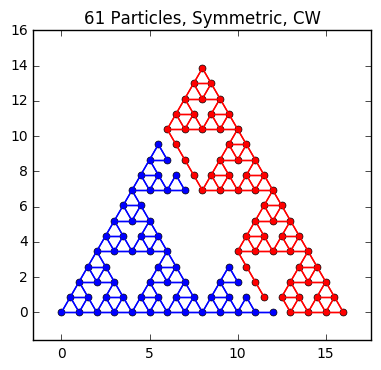

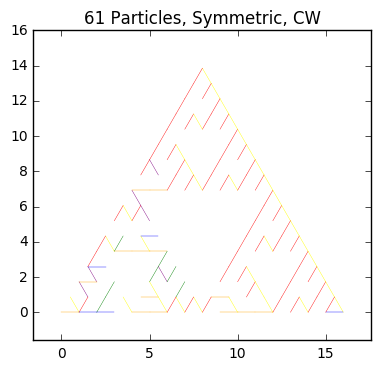

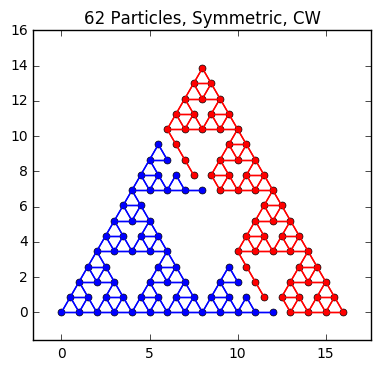

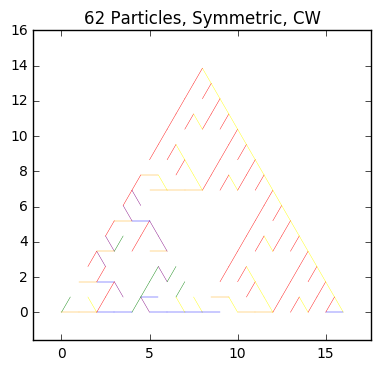

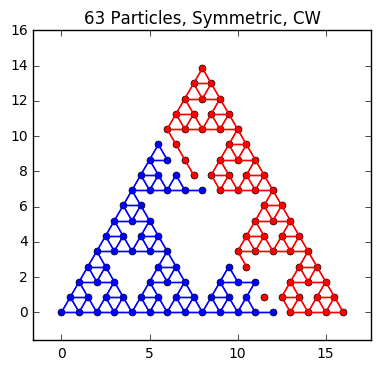

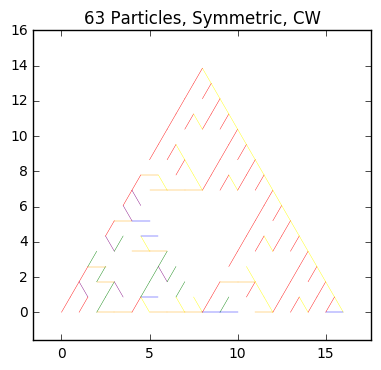

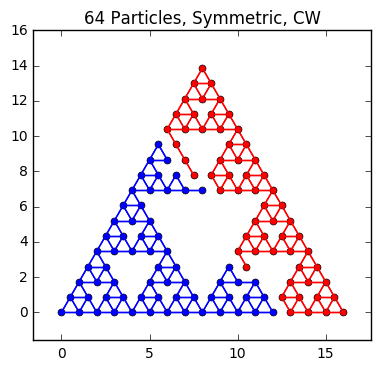

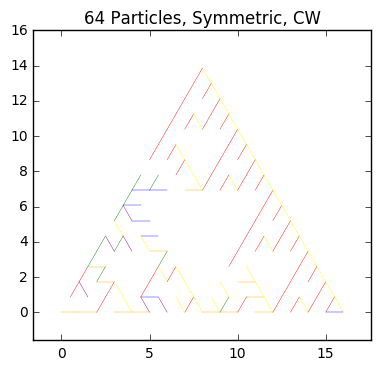

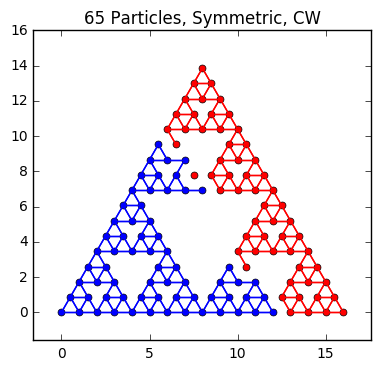

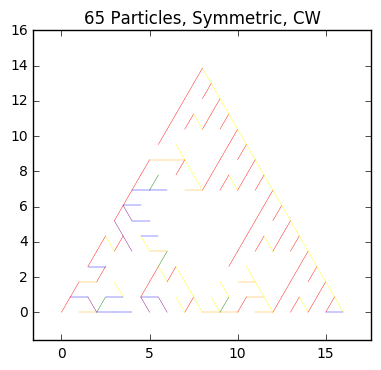

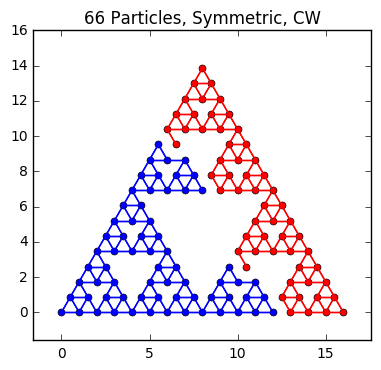

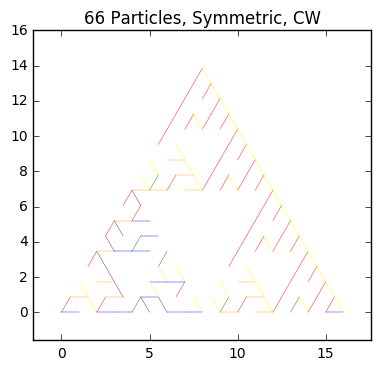

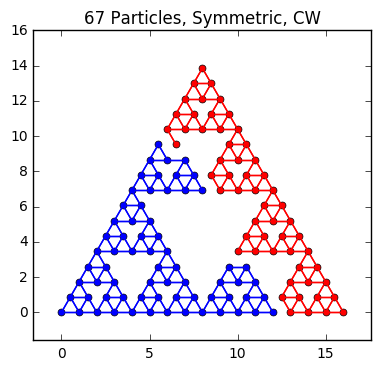

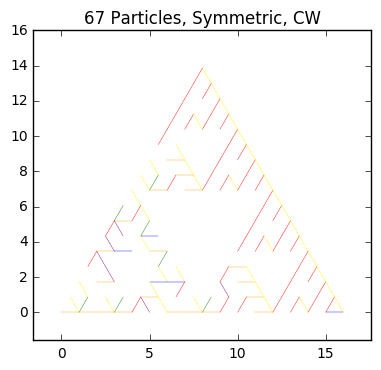

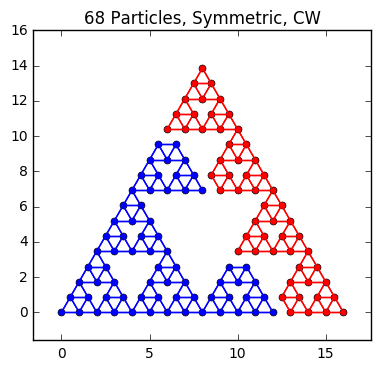

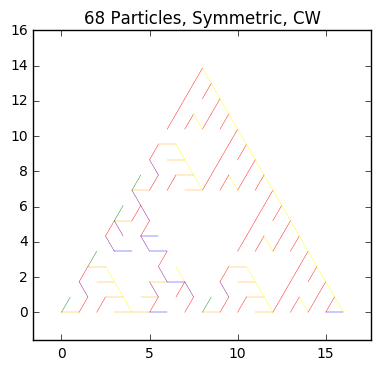

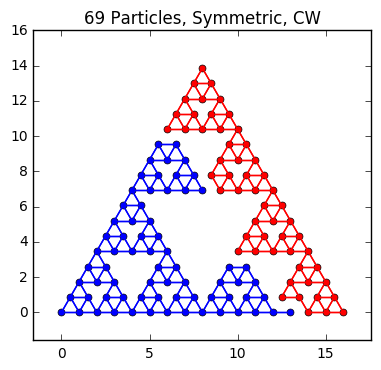

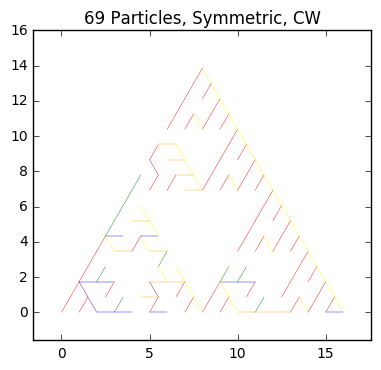

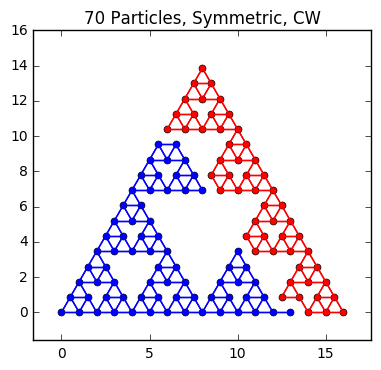

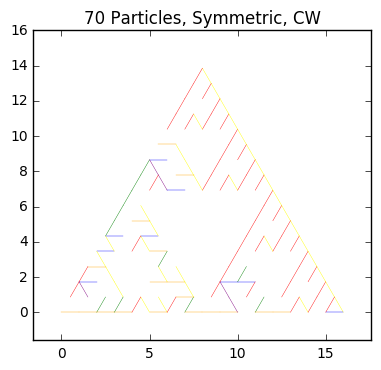

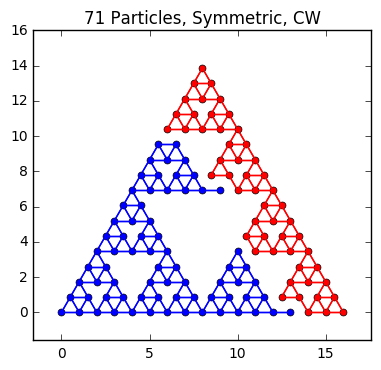

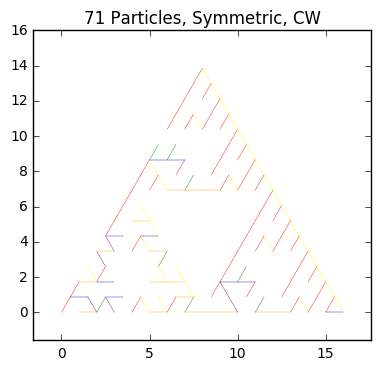

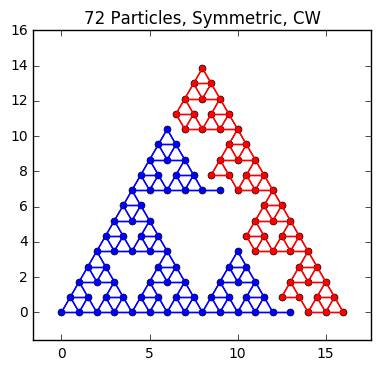

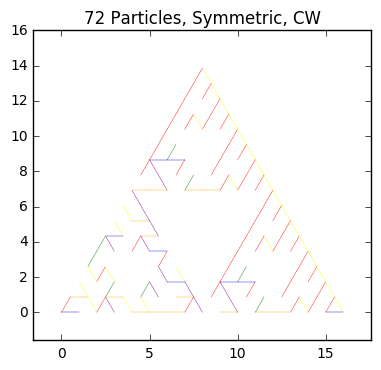

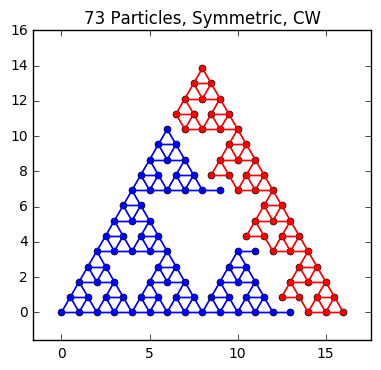

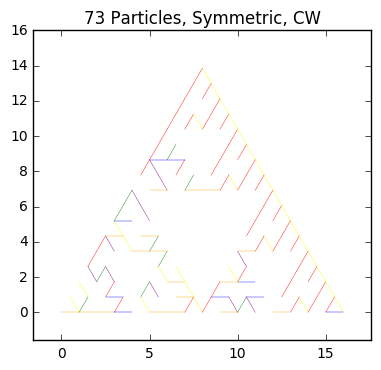

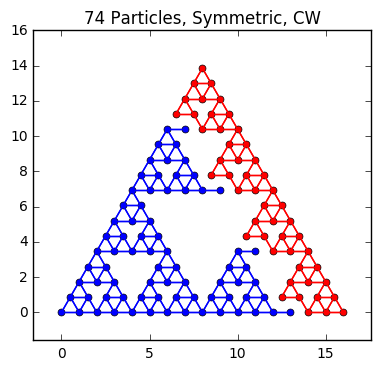

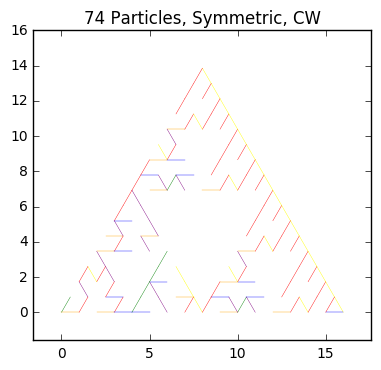

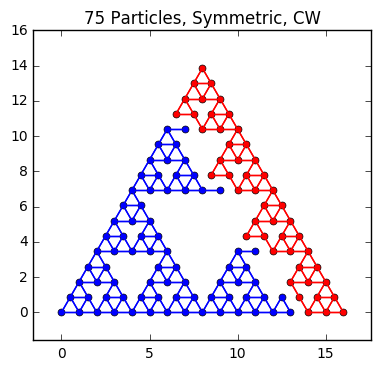

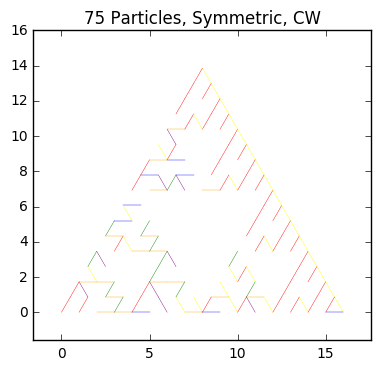

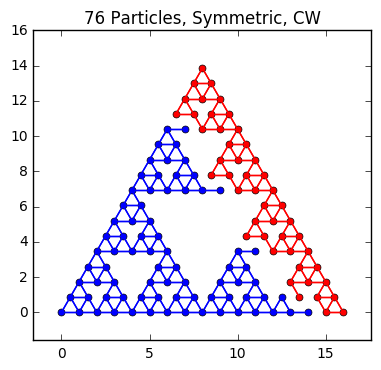

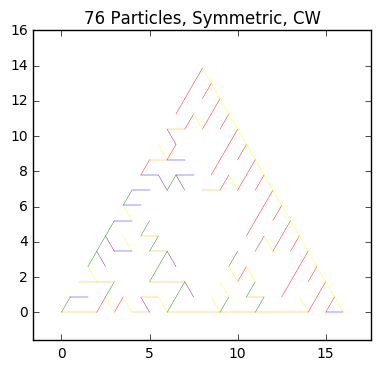

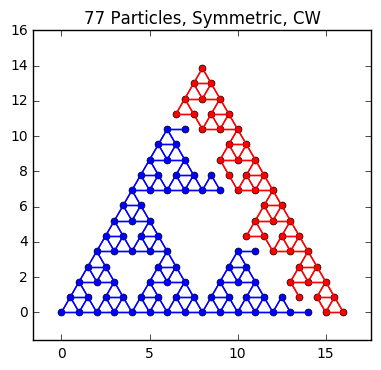

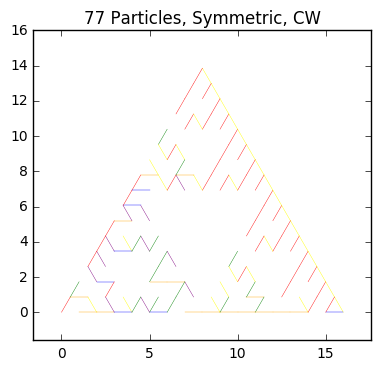

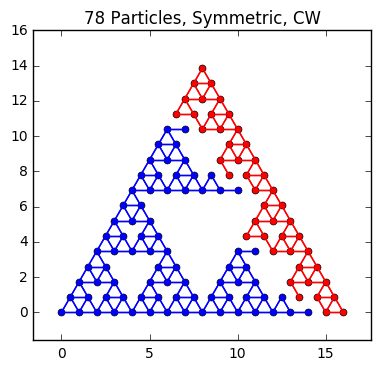

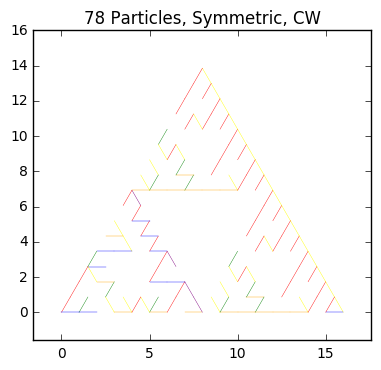

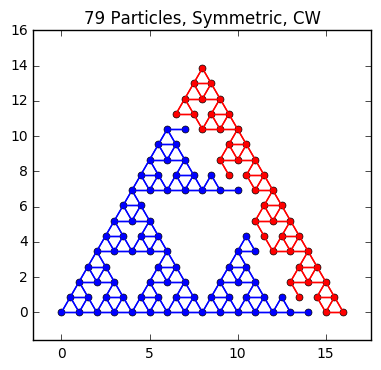

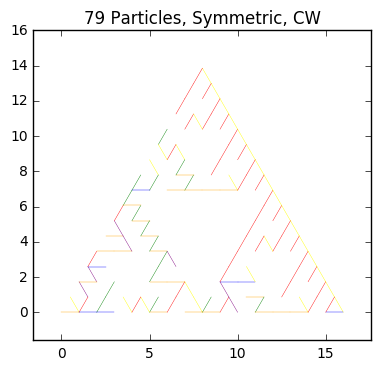

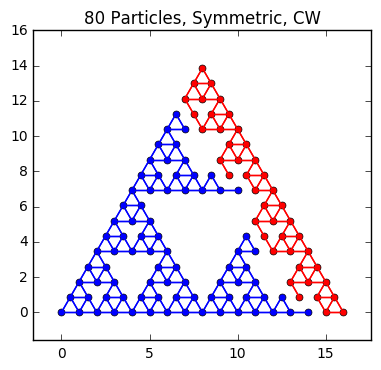

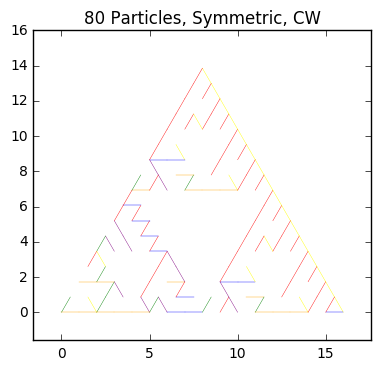

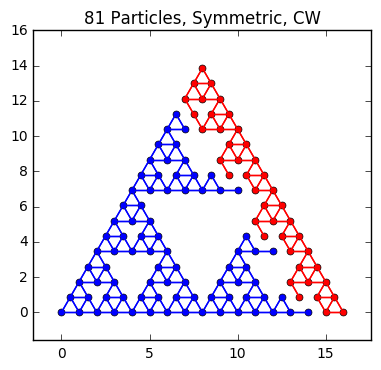

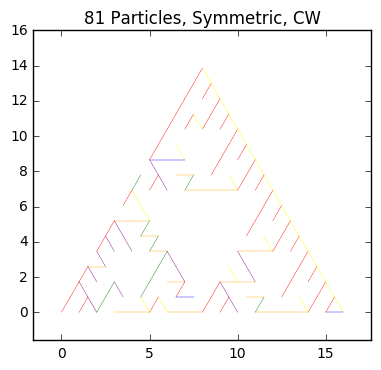

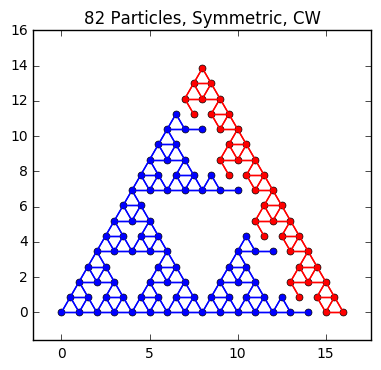

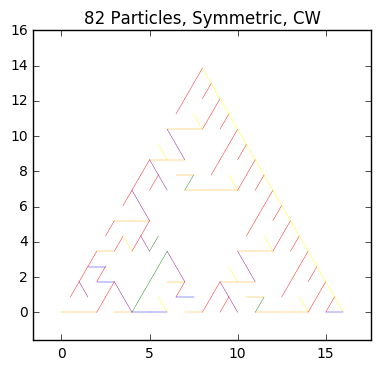

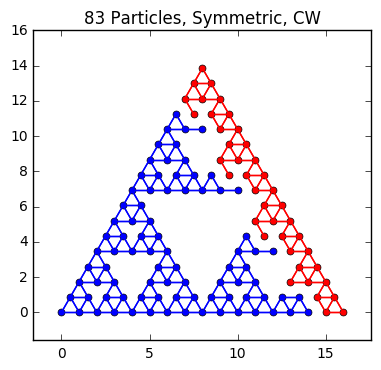

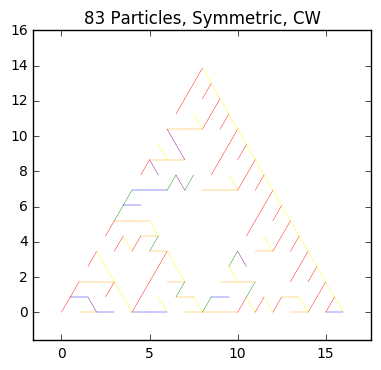

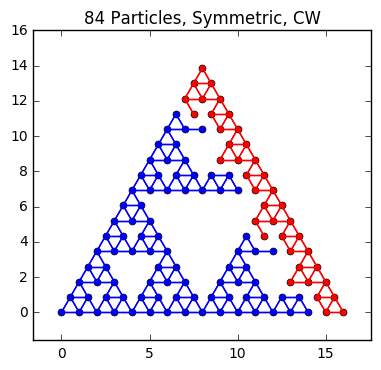

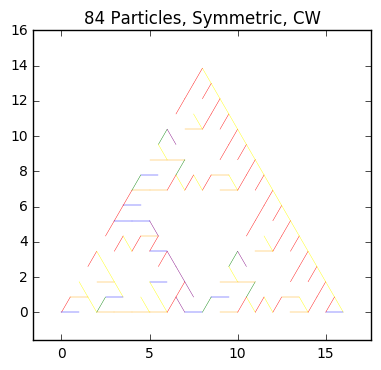

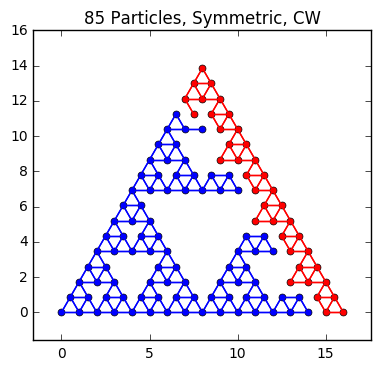

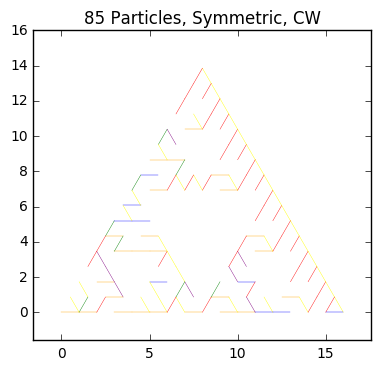

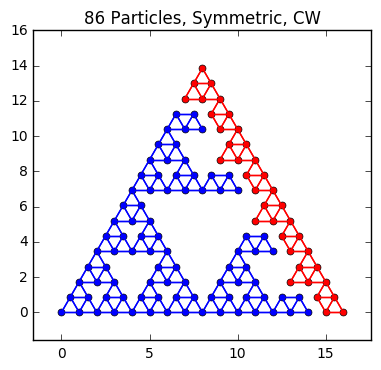

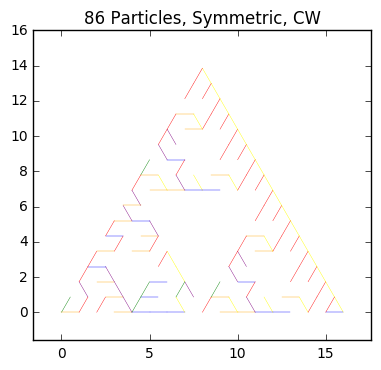

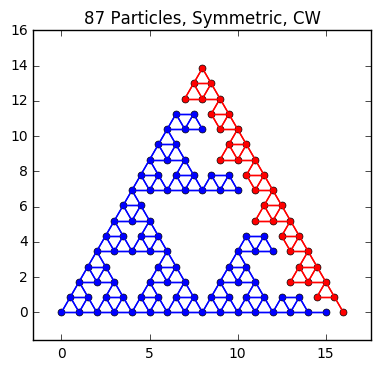

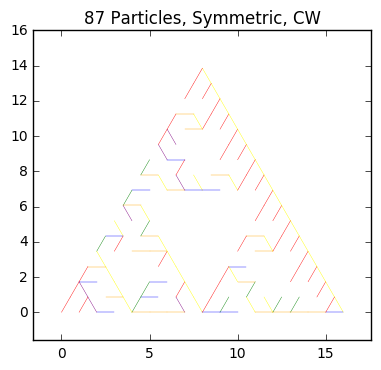

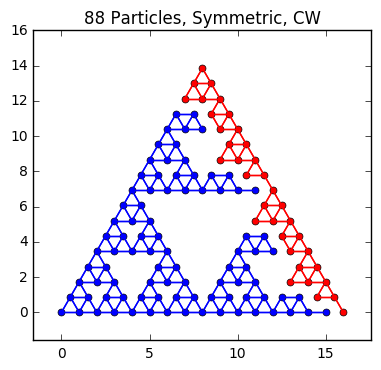

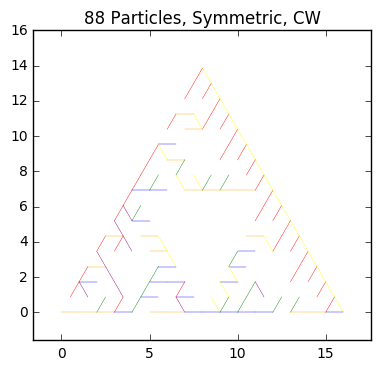

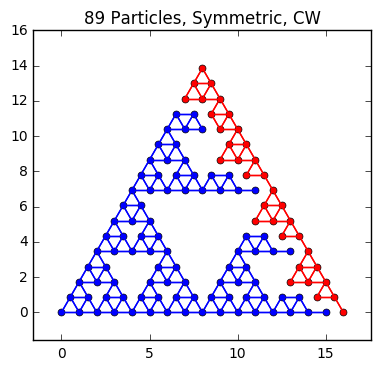

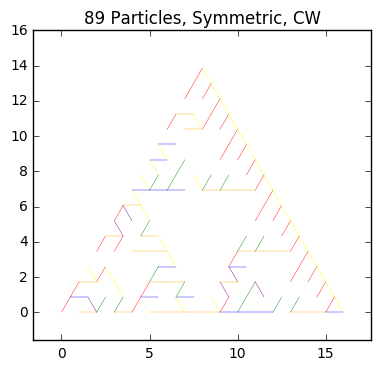

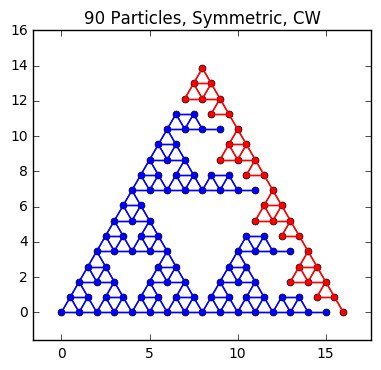

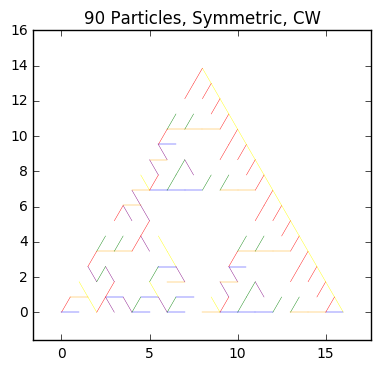

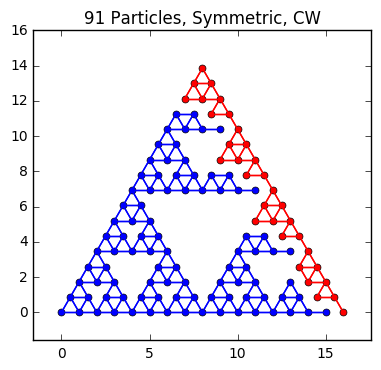

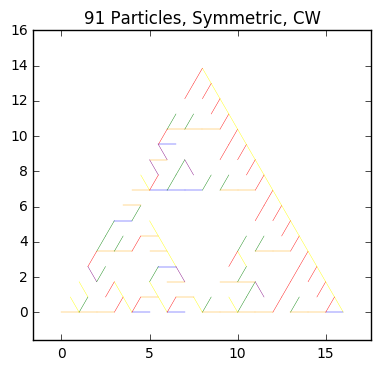

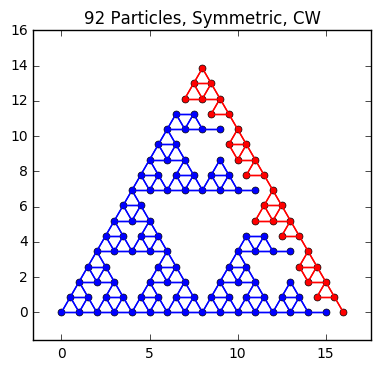

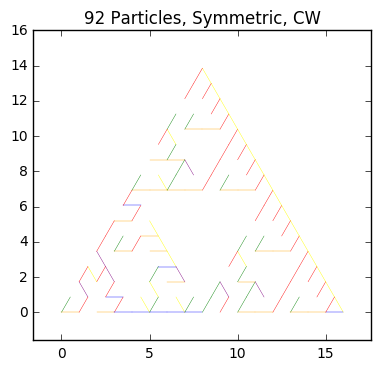

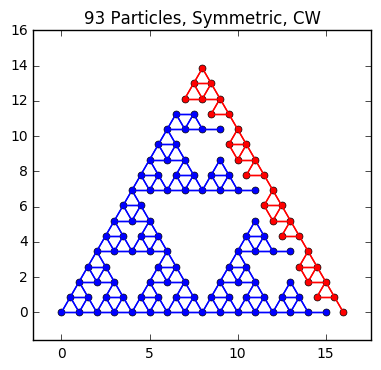

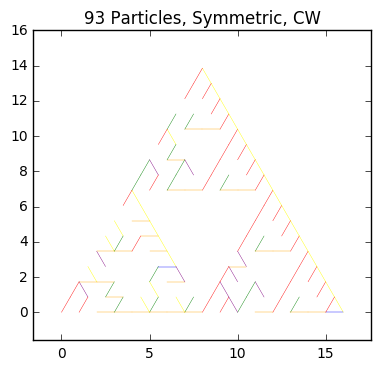

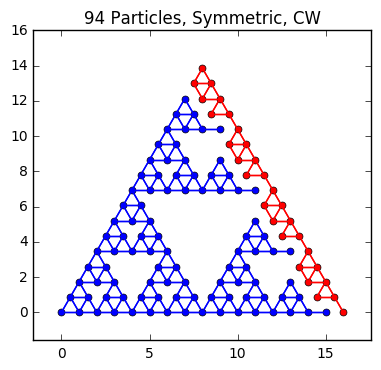

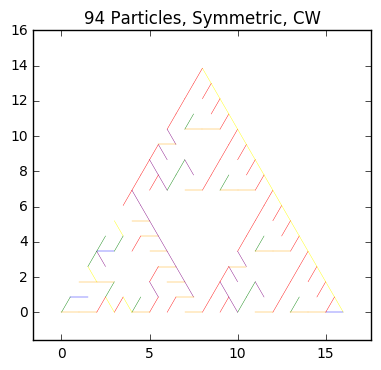

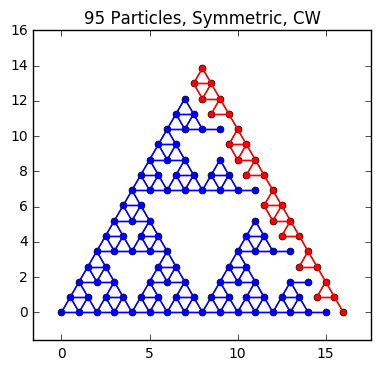

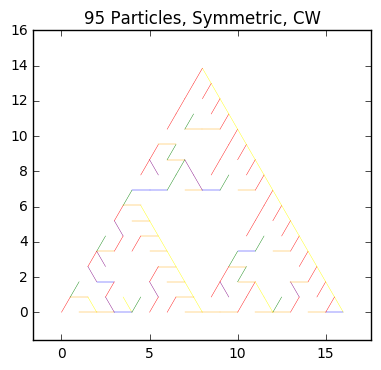

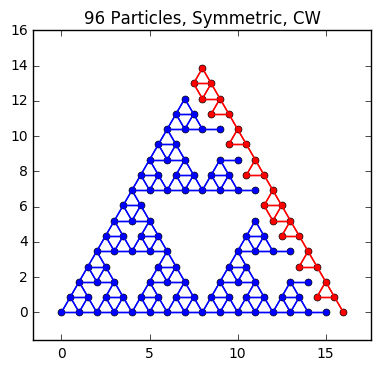

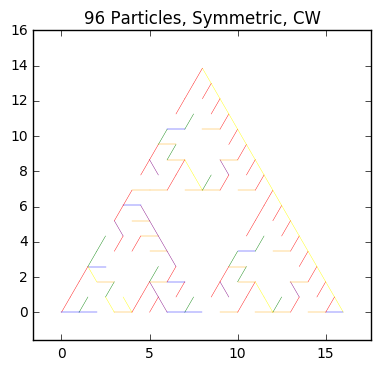

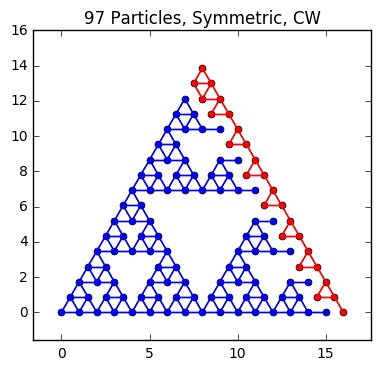

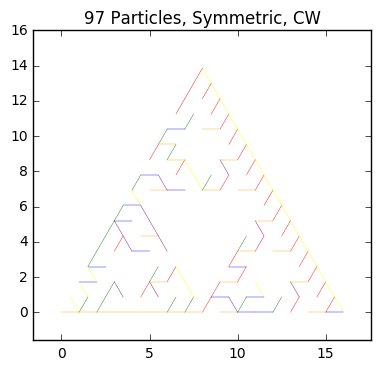

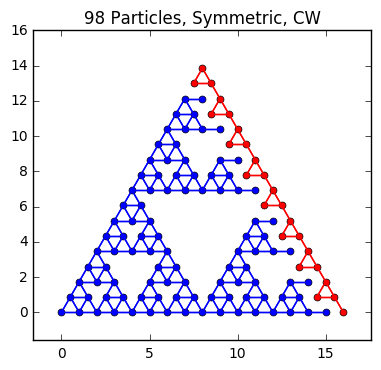

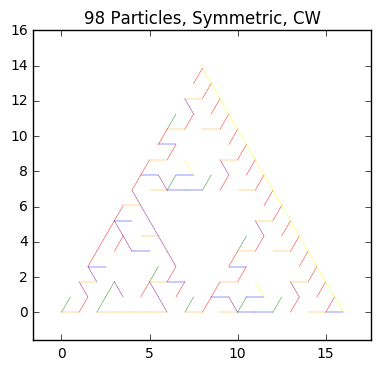

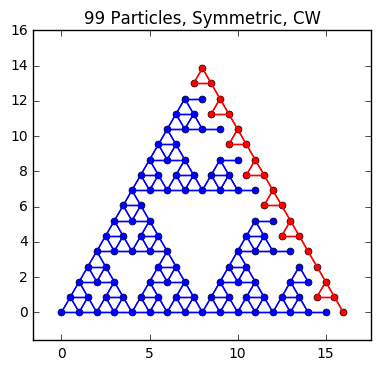

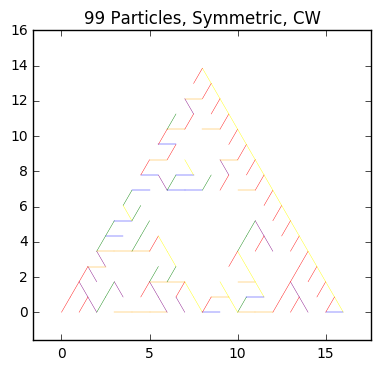

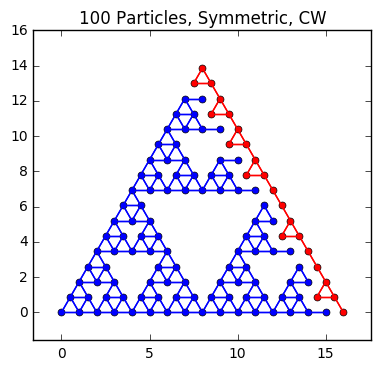

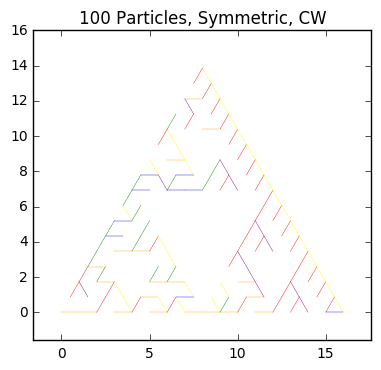

In [6]:
# Code functional for python3. Check line 5 if you are not using ipython

import matplotlib.pyplot as plt
%matplotlib inline                    
# comment out previous if not using ipython
import numpy as np
import random
from datetime import datetime
import time
import scipy.io


class particle():
    # this class creates a particle object that walks around a graph. its only property is the vertex object it occupies
    
    def __init__(self, vs):
        self.pos = vs['1']
        
class vertex:
    # this class creates a vertex within the SG 
    
    def __init__(self,xpos, ypos):
        self.r = [xpos, ypos]
        self.ns = [] #this is list of the neighbors of the vertex
        self.d = random.randint(-2,1) #this is the direction that the edge is pointing in the rotor router algorithm
        self.occ = False #this boolean property determines whether of or not the vertex is occupied by a particle
        self.level = int(round((self.r[0] + self.r[1]/np.sqrt(3)))+ 1) # this is the "sphere" that the vertex lies on
        self.row = int(round((self.r[0]-self.r[1]/np.sqrt(3)) + 1)) # this is the row intersecting the spheres
        self.colors = []
        self.h = int(round(self.r[1]/(np.sqrt(3)/2) + 1))
        self.oil = 0
        self.water = 0
        self.odometer = 0
        self.sandpile = 0
        self.od_lap = 0
        self.cuts = {}
        
        
def trisize(G):
    #This function determines the overall side length of the gasket G
    #
    # inputs: 
    #        G : a list of vertices of the generated SG
    # outputs:
    #        M : an integer telling the length of a side in vertex units of the generated SG 
    
    M = 0
    for coor in G:
        x = coor[0]
        if x > M:
            M = x
    return M

def tripler(G):
    # This functions takes a gasket and runs one recursive cycle to increase the size of the SG
    # inputs: 
    #        G : a list of vertices of the generated SG
    # outputs:
    #        trip_G : the new list of vertices once G is tripled
    
    trip_G = []
    size = trisize(G)
    for coor in G:
        x = coor[0]
        y = coor[1]
        # copy over G so far
        trip_G.append(coor)
        
    for coor in G:
        x = coor[0]
        y = coor[1]       
        # copy G to the right
        if x > 0: # as to not repeat vertices (.1 is just in case there are float point errors)
            x_new = size + x
            trip_G.append([x_new, y])
        
        # copy G above
        if x > 0 and x < size:
            x_new = x + size/2
            y_new = y + size*np.sqrt(3)/2
            trip_G.append([x_new, y_new])
    
    return trip_G

def generate(n):
    # this function generates the SG list of vertices
    # inputs: 
    #        n : (int) number of levels of recursion
    # outputs:
    #        G : (list) a lit of vertices of the generated SG
    
    G = [[0,0], [1,0], [.5, np.sqrt(3)/2]] #n = 1 Gasket
    for i in range(n-1):
        G = tripler(G)
    return G

def plotting(vs, G, size):
    # this function plots the SG with occupied vertices blue and unoccupied red.
    # inputs: 
    #        G : a list of vertices of the generated SG
    #        vs : (dictionary) dictionary of vertex objects
    #        size : side length of SG
    # outputs:
    #        figure(): plot of the SG
    
    xs_f = []
    ys_f = []
    xs_u = []
    ys_u = []
    
    for v in vs:
        if vs[v].occ:
            xs_f.append(vs[v].r[0])
            ys_f.append(vs[v].r[1])
        else:
            xs_u.append(vs[v].r[0])
            ys_u.append(vs[v].r[1])
    
    size = trisize(G)
    
    for v in vs:
        if vs[v].occ:
            plt.plot(vs[v].r[0],vs[v].r[1], 'o', markersize = 5, color= 'blue')
            for v2 in vs[v].ns:
                if v2.occ:
                    xs = [vs[v].r[0], v2.r[0]]
                    ys = [vs[v].r[1], v2.r[1]]
                    plt.plot(xs, ys, color='blue', linewidth='1')
        if not(vs[v].occ):
            plt.plot(vs[v].r[0],vs[v].r[1], 'o', markersize = 5, color= 'red')
            for v2 in vs[v].ns:
                if not(v2.occ):
                    xs = [vs[v].r[0], v2.r[0]]
                    ys = [vs[v].r[1], v2.r[1]]
                    plt.plot(xs, ys, color='red', linewidth='1')
    
    #plt.plot(xs_f, ys_f, 'o', color='blue', markersize=1, markeredgecolor='none')
    #plt.plot(xs_u, ys_u, 'o', color='red', markersize=1, markeredgecolor='none')
    plt.xlim(-size*.1, size * 1.1)
    plt.ylim(-size*.1, size)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.draw()
    

def norm(v1, v2):
    # this function finds the Euclidean distance between two 2D vectors
    # inputs: 
    #        v1 : (list) coordinates of vector 1
    #        v2 : (list) coordinates of vector 2
    # outputs:
    #        dist : (float) the Euclidean distance between v1 & v2
    
    dist =  np.sqrt((v1[0]- v2[0])**2 + (v2[1]-v1[1])**2)
    return dist
    
def initialize(G):
    # this function creates the dictionary where the names are enumerated and the values are vertex objects
    # inputs: 
    #        G : a list of vertices of the generated SG
    # outputs:
    #        vertices : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    
    vertices = {} # dictionary of vertices
    counter = 1
    for coor in G:
        vertices[str(counter)] = vertex(coor[0], coor[1])
        counter += 1
    
    for i in vertices:
        for j in vertices:
            d = norm(vertices[i].r, vertices[j].r)
            if d < 1.1 and d > .9:
                if not(vertices[j] in vertices[i].ns):
                    vertices[i].ns.append(vertices[j]) 
                if not(vertices[i] in vertices[j].ns):
                    vertices[j].ns.append(vertices[i])
    removes = []
    
    for i in vertices:
        if len(vertices[i].ns) == 6:
            for j in vertices[i].ns:
                if len(j.ns) == 6: 
                    removes.append([vertices[i], j])
    
    for pair in removes:
        i = pair[0]
        j = pair[1]
        if i in j.ns:
            j.ns.remove(i)
        if j in i.ns:
            i.ns.remove(j)
                    
    for i in vertices:
        if len(vertices[i].ns) == 5:
            for j in vertices[i].ns:
                if len(j.ns) == 5: 
                    vertices[i].ns.remove(j)
                    j.ns.remove(vertices[i])
                    
                    
    #sorting neighbors to be in correct clockwise order
    
    for i in vertices:
        ordered_ns = []
        for j in vertices[i].ns:
            if (vertices[i].r[0] - j.r[0]) > .1 and (vertices[i].r[1] - j.r[1]) > .1:
                ordered_ns.append(j)
            if (vertices[i].r[0] - j.r[0]) > .1 and abs((vertices[i].r[1] - j.r[1])) < .1:
                ordered_ns.append(j)
            if (vertices[i].r[0] - j.r[0]) > .1 and (vertices[i].r[1] - j.r[1]) < -.1:
                ordered_ns.append(j)
            if (vertices[i].r[0] - j.r[0]) < -.1 and (vertices[i].r[1] - j.r[1]) < -.1:
                ordered_ns.append(j)
            if (vertices[i].r[0] - j.r[0]) < -.1 and abs((vertices[i].r[1] - j.r[1])) < .1:
                ordered_ns.append(j)
            if (vertices[i].r[0] - j.r[0]) < -.1 and (vertices[i].r[1] - j.r[1]) > .1:
                ordered_ns.append(j)     
                
        vertices[i].ns = ordered_ns

    
    return vertices

def close(pos):
    # This functions checks if a position is at a globally specified cutpoints
    # inputs: 
    #        pos : (list) (x, y) position
    # outputs:
    #        ans: (Bool) T/F regarding whether position is the cutpoint
    
    ans = False
    for c in cuts:
        if abs(pos[0] - cuts[c][0][0]) < .1 and abs(pos[1] - cuts[c][0][1]) < .1:
            ans = True
            cuts[c][1] += 1
            
    return ans

    
def rotor_router(p, vs):
    # This function moves a particle according to the rotor router method until it occupies an unoccupied vertex
    # inputs: 
    #        vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    #        p  : (object) particle object
    # outputs:
    #        None

    while p.pos.occ:
        p.pos.odometer += 1 
        d_prev = p.pos.d
        p.pos.d = (d_prev + 1)%4 - 2 # Counter Clockwise
        p.pos.d = (d_prev - 1)%4 - 2 # Clockwise
        p.pos = p.pos.ns[p.pos.d]

    p.pos.occ = True

def random_walk(p, vs):
    # This function moves a particle according to the random walk method until it occupies an unoccupied vertex
    # inputs: 
    #        vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    #        p  : (object) particle object
    # outputs:
    #        None
    
    while p.pos.occ:
        p.pos.d = random.randint(-2,1)
        p.pos = p.pos.ns[p.pos.d]
    p.pos.occ = True
    
def reset(vs):
    # This function resets the vertices of the SG so they all appear unoccupied for the next simulation
    # inputs:
    #        vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    # outputs: 
    #        None
    
    for v in vs:
        vs[v].occ = False
        
def border(vs, rows):
    # This function finds the border of the occupied states in the SG
    # inputs:
    #        vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    #        rows : (dictionary) contains row number names and vertex object values
    # outputs: 
    #        border : (list) contains the vertex objects that border the occupied states in the SG
    
    border = []
    for row in rows:
        current = rows[row]
        for v in current:
            if v.occ == False:
                for i in range(-2,2):
                    if v.ns[i].occ and not(v.ns[i] in border):
                        border.append(v.ns[i])
    return border

def border2(vs, rows, s):
    # This function finds the border of the occupied states in the SG
    # inputs:
    #        vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    #        rows : (dictionary) contains row number names and vertex object values
    # outputs: 
    #        border : (list) contains the vertex objects that border the occupied states in the SG
    
    border = np.zeros(s+1)-10
    
    for v in vs:
        if vs[v].occ and vs[v].level < s+1 and border[vs[v].row - 1] < vs[v].level:
            border[vs[v].row - 1] = vs[v].level
    
    return border
                
def make_rows(vs, n):
    # This function assigns all vertices their respective row numbers
    # inputs:
    #        vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    #        n  : (int) the recursion level of the SG
    # outputs: 
    #        rows : (dictionary) contains row number names and vertex object values
    
    num_rows = 2**(n-1) + 1
    rows = {}
    
    for i in range(num_rows):
        rows[str(i+1)] = []
    
    for v in vs:
        row_num = vs[v].row
        rows[str(row_num)] = rows[str(row_num)] + [vs[v]]
    return rows

                
def make_spheres(vs, n):
    # This function assigns all spheres the number of vertices within them
    # inputs:
    #        vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    #        n  : (int) the recursion level of the SG
    # outputs: 
    #        spheres : (list) ordered by sphere number, this list contains the number of vertices in each sphere
    
    num_spheres = 2**(n-1) + 1
    spheres = np.zeros(num_spheres)

    for v in vs:
        sphere_num = int(vs[v].level - 1)
        spheres[sphere_num] += 1
    return spheres

def avg_sphere(spheres, particles):
    # This function finds the expected number of spheres filled, given the number of particles in the simulation
    # inputs:
    #        spheres : (list) ordered by sphere number, this list contains the number of vertices in each sphere
    #        particles : (int) the number of walkers in the given simulation
    # outputs: 
    #        avg : (float) the expected number of spheres filled
    
    count = 0
    iterator = 0
    while count < particles:
        count += spheres[iterator]
        iterator += 1
        
    avg = iterator - + (count % particles) /(((spheres[iterator-1]) + spheres[iterator-2])/2)
    return avg

def plot_border(vs, rows):
    # This function plots the border of the occupied states
    # inputs:
    #        vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    #        rows : (dictionary) contains row number names and vertex object values
    # outputs: 
    #        None
    
    border_vs = border(vs, rows)
    b_x = []
    b_y = []
    for v in border_vs:
        b_x.append(v.r[0])
        b_y.append(v.r[1])
    
    plt.plot(b_x, b_y, 'x', markersize=10)
    
def residuals(border, avg, resids):
    # This function finds the residuals between the expected and simulated border values
    # inputs:
    #       border : (list) contains the vertex objects that border the occupied states in the SG
    #       avg : (float) the expected number of spheres filled
    #       resids : (list) contains the individual residuals
    # outputs: 
    #       resids : (list) contains the individual residuals
    
    for i in border:
        resids.append(i.level-avg)
        
    return resids

def cycle(cycles, particles, resids, vs, rows, avg, walktype):
    # This function runs one cycle of the simulation of walkers
    # inputs:
    #       cycles : (int) number of cycles of the simulation to run
    #       particles : (int) the number of walkers in the given simulation
    #       resids : (list) contains the individual residuals
    #       vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    #       rows : (dictionary) contains row number names and vertex object values
    #       avg : (float) the expected number of spheres filled
    #       walktype : (function handle) either rotor router or random walk algorythm
    # outputs: 
    #       resids : (list) contains the individual residuals
    
    for i in range(cycles):
        for i in range(particles):
            p = particle(vs)
            walktype(p, vs)

        border_vs = border(vs, rows) 
        resids = residuals(border_vs, avg, resids)
        reset(vs)
        
    return resids

def cycle2(cycles, particles, resids, vs, rows, avg, walktype):
    # This function runs one cycle of the simulation of walkers
    # inputs:
    #       cycles : (int) number of cycles of the simulation to run
    #       particles : (int) the number of walkers in the given simulation
    #       resids : (list) contains the individual residuals
    #       vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    #       rows : (dictionary) contains row number names and vertex object values
    #       avg : (float) the expected number of spheres filled
    #       walktype : (function handle) either rotor router or random walk algorythm
    # outputs: 
    #       resids : (list) contains the individual residuals
    
    for i in range(cycles):
        for i in range(particles):
            p = particle(vs)
            walktype(p, vs)

        border_vs = border(vs, rows) 
        reset(vs)
        
        border_vs.sort(key=lambda x: x.row, reverse=True)
        xs = []
        ys = []
        for i in border_vs:
            xs.append(i.row)
            ys.append(i.level)

        for x in range(min(xs), max(xs)):
            if not(x in xs):
                xs.append(x)
                ys.append(avg)
        
        for y in ys:
            y2 = int(y -avg)
            if y2 in resids:
                resids[y2] = resids[y2] + 1
            else:
                resids[y2] = 1
        
        
    return resids

def single_run(particles, vs, walktype):
    # This function runs one cycle of the simulation of walkers
    # inputs:
    #       particles : (int) the number of walkers in the given simulation
    #       vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    #       walktype : (function handle) either rotor router or random walk algorythm
    # outputs: 
    #       vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    
    for i in range(particles):
        p = particle(vs)
        walktype(p, vs)

    return vs

def sort_neighbors(vs):
    # This function sorts the list of neighbors in vs in a clockwise order starting with the neighbor up to the right,
    # (if it has one), then the neighbor directly to the right
    # inputs:
    #       vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    # outputs: 
    #       None
    
    for v in vs:
        new_ns = []
        colors = []
        for n in vs[v].ns:
            #upper right edge
            if n.r[0] > vs[v].r[0] and n.r[1] > vs[v].r[1]:
                new_ns.append(n)
                colors.append('red')
        for n in vs[v].ns:
            #right edge
            if (n.r[0] - vs[v].r[0]) == 1:
                new_ns.append(n)
                colors.append('orange')
        for n in vs[v].ns:
            #bottom right edge
            if n.r[0] > vs[v].r[0] and n.r[1] < vs[v].r[1]:
                new_ns.append(n) 
                colors.append('yellow')
        for n in vs[v].ns:
            #bottom left edge
            if n.r[0] < vs[v].r[0] and n.r[1] < vs[v].r[1]:
                new_ns.append(n)
                colors.append('green')
        for n in vs[v].ns:
            #left edge
            if (n.r[0] - vs[v].r[0]) == -1:
                new_ns.append(n)
                colors.append('blue')
        for n in vs[v].ns:
            #upper left edge
            if n.r[0] < vs[v].r[0] and n.r[1] > vs[v].r[1]:
                new_ns.append(n)
                colors.append('purple')
        vs[v].ns = new_ns
        vs[v].colors = colors
                
def plot_rotor(vs, size):
    # This function plots the rotor directions
    # inputs:
    #       vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    #       size: size of the SG determined from trisize
    # outputs: 
    #       None
    
    for v in vs:
        c = vs[v].colors[vs[v].d]
        x1 = vs[v].r[0]
        y1 = vs[v].r[1]
        x2 = vs[v].ns[vs[v].d].r[0]
        y2 = vs[v].ns[vs[v].d].r[1]
        plt.plot([x1, x2], [y1,y2], color=c, linewidth=.3)
        
    plt.xlim(-size*.1, size * 1.1)
    plt.ylim(-size*.1, size)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.draw()
    
    
def plot_boundary(vs, border,avg):

    border.sort(key=lambda x: x.row, reverse=True)
    xs = []
    ys = []
    for i in border:
        xs.append(i.row)
        ys.append(i.level)
    
    for x in range(min(xs), max(xs)):
        if not(x in xs):
            xs.append(x)
            ys.append(avg)
    
    plt.plot(xs, ys, 'o', label='plot boundary')
    plt.ylim([min(ys)-3, max(ys)+3])
    plt.ylabel('sphere #')
    plt.legend(loc='best')
    
    return np.array(xs), np.array(ys) - avg

def boundary_shape(vs, border,avg, s):
    border.sort(key=lambda x: x.row, reverse=True)
    xs = np.arange(1, s+2)
    ys = np.zeros(s+1)-15
    for i in border:
        if i.row < s+2:
            if (i.level-avg) > ys[i.row-1]:
                ys[i.row-1] = ((i.level-avg))
        
    for x in np.arange(1,s+2):
        if ys[x-1] == -15:
            ys[x-1] = 0
            
    return np.array(xs), np.array(ys)

def boundary_shape_right(vs, border,avg, s):
    border.sort(key=lambda x: x.h, reverse=True)
    xs = np.arange(1, s+2)
    ys = np.zeros(s+1)-15
    for i in border:
        if i.h < s+2:
            if (i.level-avg) > ys[i.h-1]:
                ys[i.h-1] = ((i.level-avg))
        
    for x in xs:
        if ys[x-1] == -15:
            ys[x-1] = 0
    
    flip_y = np.zeros(len(ys))
    for i in range(len(ys)):
        flip_y[len(ys) - i - 1] = ys[i]
        
    return np.array(xs), flip_y

def covmat(lev, epsilon, cycles, spheres, vs, walktype, rows):
    
    p_num_array = part_num_array(spheres)
    
    s = int(lev * epsilon)
    particles = p_num_array[s]
    avg = avg_sphere(spheres, particles)
    
    covmat = np.zeros((cycles,s+1))

    for i in range(cycles):
        print(i)
        ps = np.random.poisson(particles)
        vs = single_run(ps, vs, walktype)
        bord = border(vs, rows)
        xs, ys = boundary_shape(vs, bord,avg, s)
        xs2, ys2 = boundary_shape_right(vs, bord,avg, s)
        covmat[i] = (ys + ys2)/2
    
        for v in vs:
            vs[v].occ = False

    scipy.io.savemat('/Users/jkudlerflam/Documents/MATLAB/covmat_%s_%d.mat' % (str(int(epsilon *lev)), cycles), mdict={'covmat%s_%d'% (str(int(lev * epsilon)), cycles): covmat})

def part_num_array(spheres):
    tot = 0
    part_num_array = []

    for s in spheres:
        tot += s
        part_num_array.append(int(tot))

    return part_num_array

def check_oil_water(vs):
    for v in vs:
        if vs[v].oil > 0 and vs[v].water > 0:
            return False
        
    return True
        
def oil_water(vs, particles):
    
    vs['1'].oil = particles
    vs['1'].water = particles
    
    while not(check_oil_water(vs)):
        for v in vs:
            while vs[v].oil > 0 and vs[v].water > 0:
                vs[v].oil = vs[v].oil - 1
                vs[v].water = vs[v].water - 1
                
                vs[v].odometer += 1

                d1 = random.randint(-2,1)
                d2 = random.randint(-2,1)
                vs[v].ns[d1].oil = vs[v].ns[d1].oil + 1
                vs[v].ns[d2].water = vs[v].ns[d2].water + 1    

def plot_oil_water(vs, G):
    
    x_o = []
    y_o = []
    s_o = []
    x_w = []
    y_w = []
    s_w = []
    x_e = []
    y_e = []
    
    for v in vs:
        if vs[v].oil > 0:
            x_o.append(vs[v].r[0])
            y_o.append(vs[v].r[1])
            s_o.append(vs[v].oil)

        elif vs[v].water > 0:
            x_w.append(vs[v].r[0])
            y_w.append(vs[v].r[1])
            s_w.append(vs[v].water)
            
        else:
            x_e.append(vs[v].r[0])
            y_e.append(vs[v].r[1])
            
    plt.scatter(x_o, y_o,s=np.array(s_o)/500, color='red',label=r'$oil$')
    plt.scatter(x_w, y_w, s=np.array(s_w)/500, color='blue', label=r'$water$')
    plt.plot(x_e, y_e, 'o', color='grey', markersize=2,markeredgecolor='none')
    plt.legend(loc='best', frameon = False)
    size = trisize(G)
    
    plt.xlim(-size*.1, size * 1.1)
    plt.ylim(-size*.1, size)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.draw()

def plot_odometer(vs, G, n):
    
    sizer = [10, 10, 10, 10, 5, 3, 1, 1]
    
    xs = []
    ys = []
    zs = []
    
    for v in vs:
        xs.append(vs[v].r[0])
        ys.append(vs[v].r[1])
        zs.append(vs[v].odometer)
        
    size = trisize(G)


    
    plt.xlim(-size*.1, size * 1.1)
    plt.ylim(-size*.1, size * 1.1)
    
    for i in range(len(zs)):
        plt.figure(1)
        plt.annotate(str(zs[i]),xy=(xs[i],ys[i]), size=sizer[n])
    
    plt.gca().set_aspect('equal', adjustable='box')
    
def od_hist(vs):
    l = []
    for v in vs:
        if vs[v].odometer > 0:
            #print(vs[v].odometer)
            l.append(vs[v].odometer)
            
    plt.hist(l, bins=np.logspace(0, 6, 50))
    plt.gca().set_xscale("log")
    
def o_w_scaling(vs, spheres):
    p_n_a = part_num_array(spheres)
    
    max_ns = []
    
    for p in p_n_a:
        
        oil_water(vs, round(p/2 + (random.random()/100 - .005)))
        
        max_n = 0
        for v in vs:
            if (vs[v].oil > 0 or vs[v].water > 0) and vs[v].level > max_n:
                max_n = vs[v].level
            vs[v].oil = 0
            vs[v].water = 0
            vs[v].odometer = 0

        max_ns.append(max_n)
        
    return max_ns

def sandpile(vs, particles):   
    vs['1'].sandpile = vs['1'].sandpile + particles
    
    while not(check_sandpile(vs)):
        for v in vs:
            while vs[v].sandpile >= len(vs[v].ns):
                vs[v].sandpile = vs[v].sandpile - len(vs[v].ns)
                vs[v].odometer += 1
                for n in vs[v].ns:
                    n.sandpile += 1
                
def check_sandpile(vs):
    
    for v in vs:
        if vs[v].sandpile >= len(vs[v].ns):
            return False
    
    return True

def plot_sandpile(vs, G, n):

    
    colors = ['magenta', 'green', 'cyan', 'blue']
    
    msize = [1, 1, 1, 1, 20, 5, 3, .5, .1, .1]
    
    sz = msize[n-1]
    
    for v in vs:
        tot = 0
        for n in vs[v].ns:
            if n.sandpile > 0:
                tot +=1
                
        if tot > 0:
            x = vs[v].r[0]
            y = vs[v].r[1]
            c = colors[vs[v].sandpile]
            #plt.plot(x,y,'o',color=c, markersize=.5, markeredgecolor='none')
            plt.scatter(x,y,color=c, s=sz)
    
    import matplotlib.patches as mpatches
    mag = mpatches.Patch(color='magenta', label='0')
    green = mpatches.Patch(color='green', label='1')
    cyan = mpatches.Patch(color='cyan', label='2')
    blue = mpatches.Patch(color='blue', label='3')
    
    plt.legend(handles=[mag, green, cyan, blue], frameon = False)
    size = trisize(G)
    
    plt.xlim(-size*.1, size * 1.1)
    plt.ylim(-size*.1, size)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.draw()

def reset_sandpile(vs):
    # This function resets the number of grains of sand to 0
    # inputs:
    #       vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values

    for v in vs:
        vs[v].sandpile=0

def manna(vs, particles):
    # This function runs the SG according to the manna model
    # inputs:
    #       particles : (int) the number of walkers in the given simulation
    #       vs : (dictionary) contains enumerated names (e.g. '1', '234', etc.) and vertex object values
    # outputs: 
    #       None
    
    vs['1'].sandpile = particles
    
    while not(check_sandpile(vs)):
        for v in vs:
            while vs[v].sandpile >= len(vs[v].ns):
                
                vs[v].sandpile = vs[v].sandpile - len(vs[v].ns)
                
                ns = []
                for i in range(len(vs[v].ns)):
                    ns.append(random.randint(0,len(vs[v].ns)-1))
                
                for n in ns:
                    vs[v].ns[n].sandpile += 1

def spectral_gaps(vs, spectrum):
 
    M = 0
    for v in vs:
        if vs[v].sandpile > 0 and vs[v].level > M:
            M = vs[v].level
    
    spectrum.append(M)
    
    return spectrum

def od_lap(vs, G, idx):
    sizer = [10, 10, 10, 10, 5, 3, 1, 1]
    
    for v in vs:
        degree = len(vs[v].ns)
        neighbor_od = 0
        for n in vs[v].ns:
            neighbor_od += n.odometer
            
        vs[v].od_lap = - vs[v].odometer + 1/degree * (neighbor_od)
        
    xs = []
    ys = []
    zs = []
    
    for v in vs:
        xs.append(vs[v].r[0])
        ys.append(vs[v].r[1])
        zs.append(vs[v].od_lap)
        
    size = trisize(G)


    
    plt.xlim(-size*.1, size * 1.1)
    plt.ylim(-size*.1, size * 1.1)
    
    for i in range(len(zs)):
        plt.figure(1)
        plt.annotate(str(zs[i]),xy=(xs[i],ys[i]), size=sizer[idx])
    
    plt.gca().set_aspect('equal', adjustable='box')
    
def minus_half_boundary(vs, spheres, lev):
    bound = 0
    for v in vs:
        b=0
        if vs[v].level == lev:
            for n in vs[v].ns:                
                if n.level == lev + 1:
                    b = 1                   
            if b == 1:
                bound += 1
    
    tot = 0 
    
    for i in range(lev):
        tot += spheres[i]
        
    return tot - .5 * bound
    
def main():
    
    ############### PARAMETERS #################
    n = 0
    particles = 0
    walktype = rotor_router
    ############################################
    
    t0 = time.time()
    
    ############### INITIALIZE #################
    random.seed(datetime.now())   
    G = generate(n)                
    vs = initialize(G)            
    sort_neighbors(vs)
    rows = make_rows(vs, n)        
    spheres = make_spheres(vs, n)
    size = trisize(G)
    ############################################
    
    t1 = time.time()
    print('initialize time:', t1-t0)
    
    ############### SIMULATION #################

    ############################################

    t2 = time.time()
    print('simulation time:', t2-t1)

    ################ PLOTTING ##################

    ############################################
    
    t3 = time.time()
    print('plotting time:', t3-t2)
    
    
    ################## EXTRA ###################
    ############################################
    

main()

print('done')
